In [9]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
# Load the dataset
print(" Dataset Information")
print("-" * 50)
df = pd.read_csv('data.csv')
print("Dataset Shape:", df.shape)
print("\nColumn Information:")
print(df.info())

 Dataset Information
--------------------------------------------------
Dataset Shape: (4424, 1)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

Attribute and Characteristics


Dataset Information
--------------------------------------------------
Number of rows: 4424
Number of columns: 37

Column Names:
['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd se

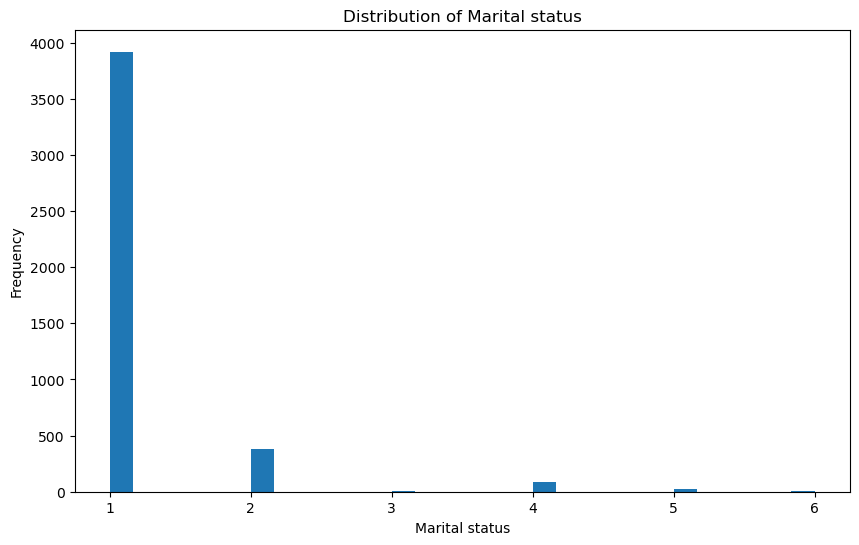

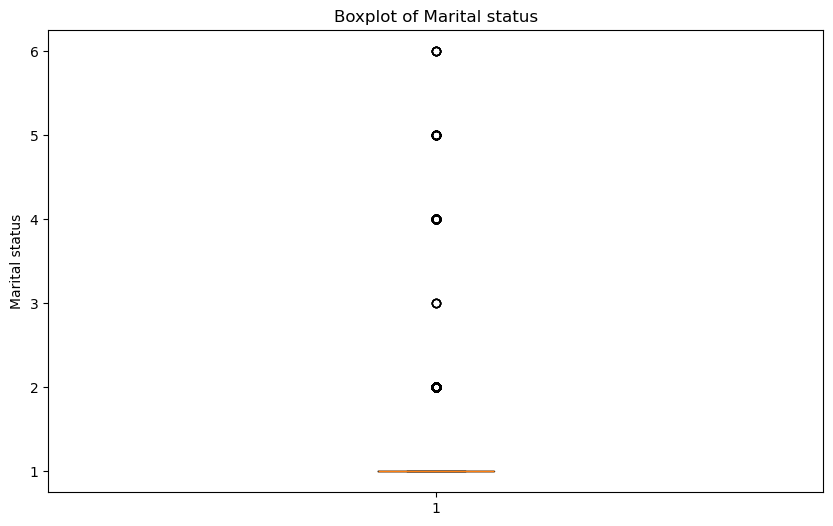

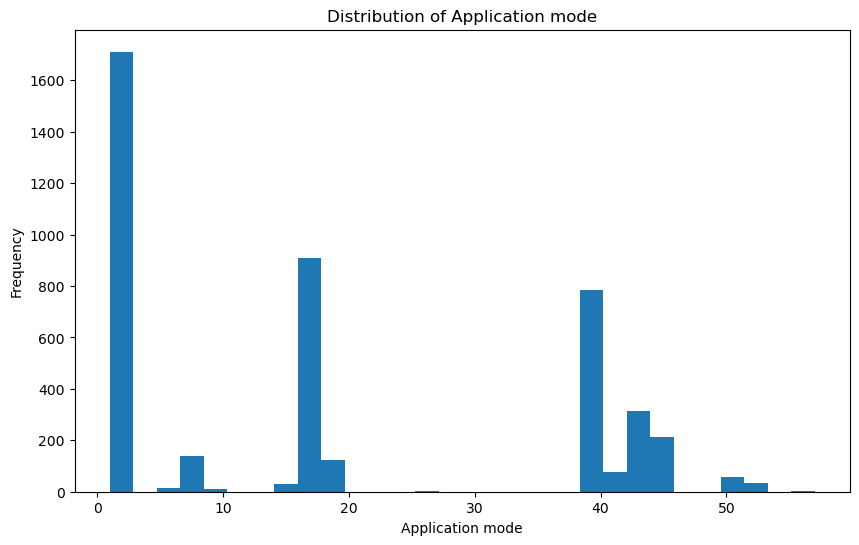

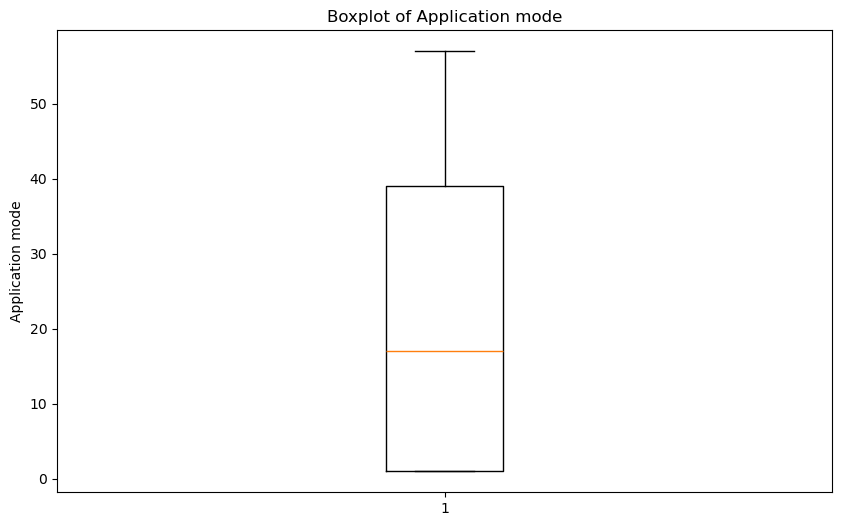

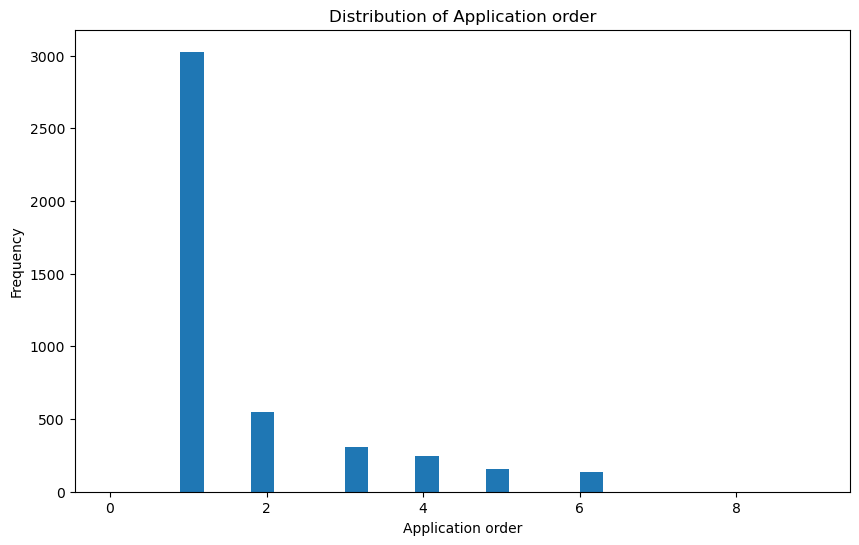

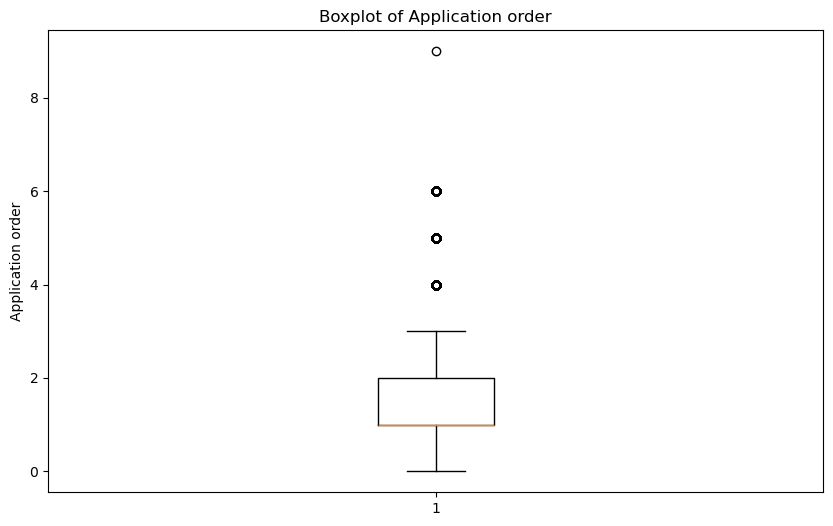

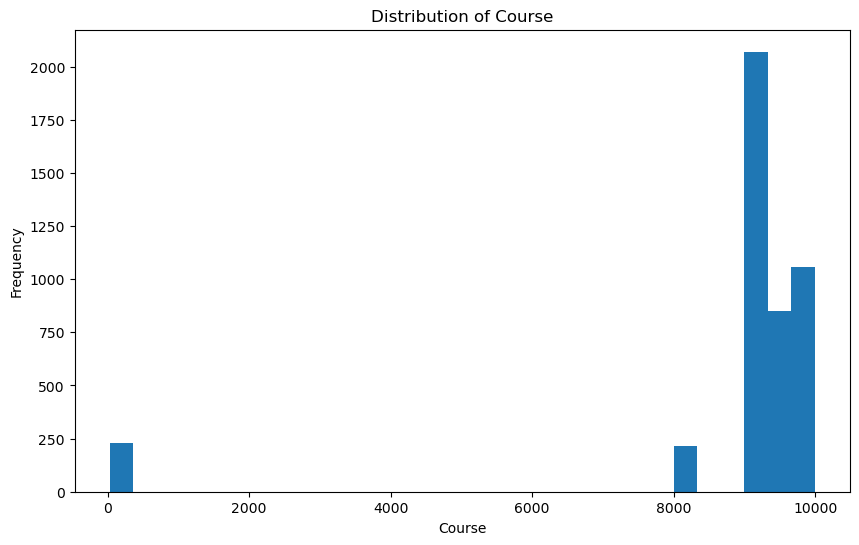

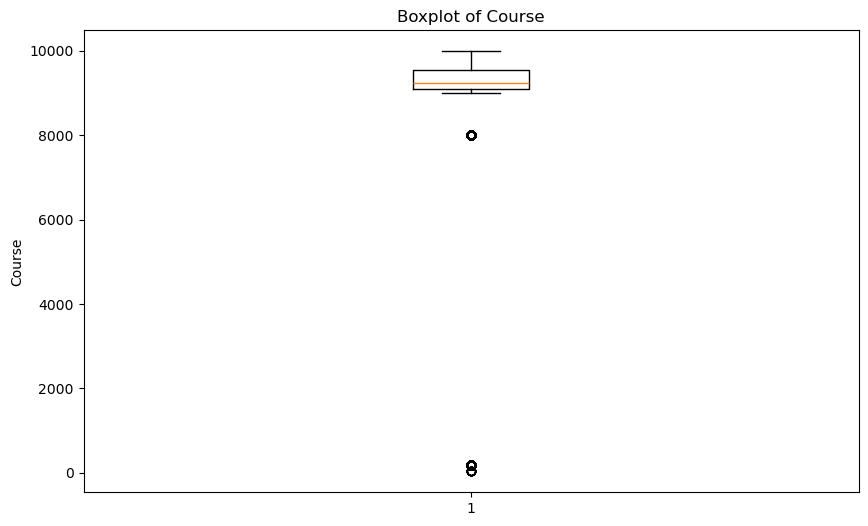

/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


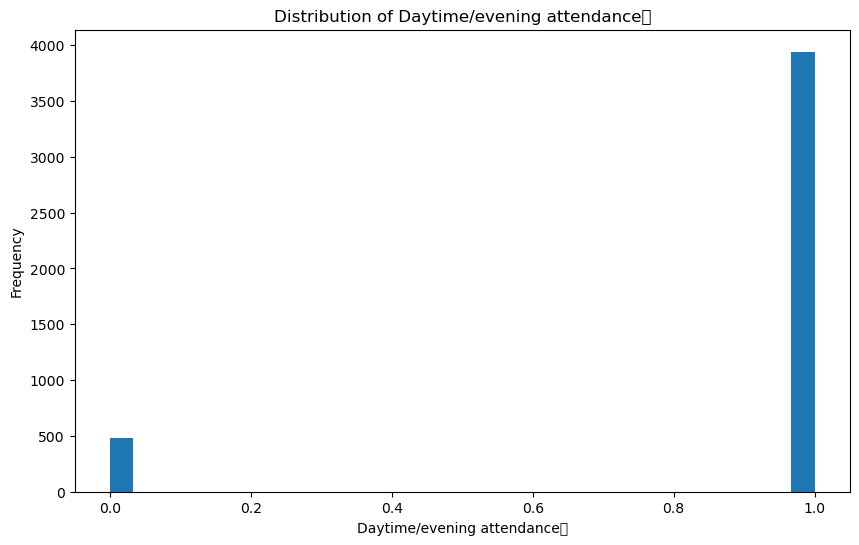

/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


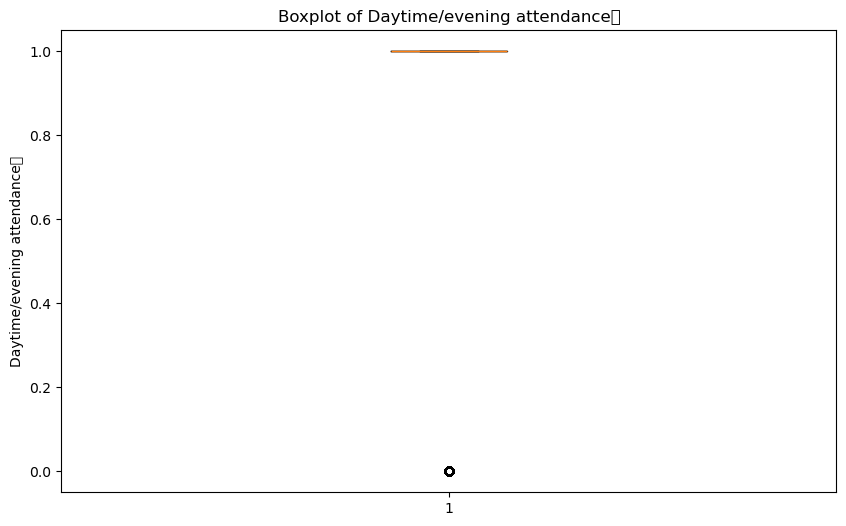

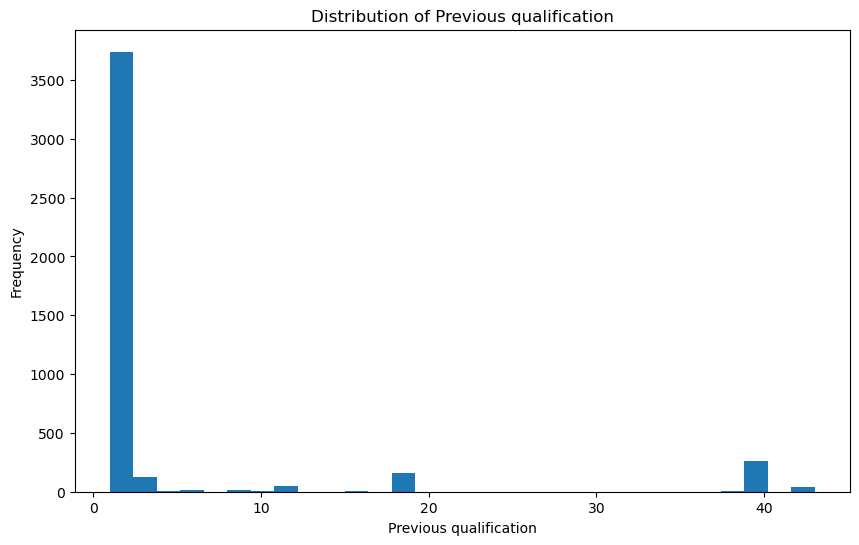

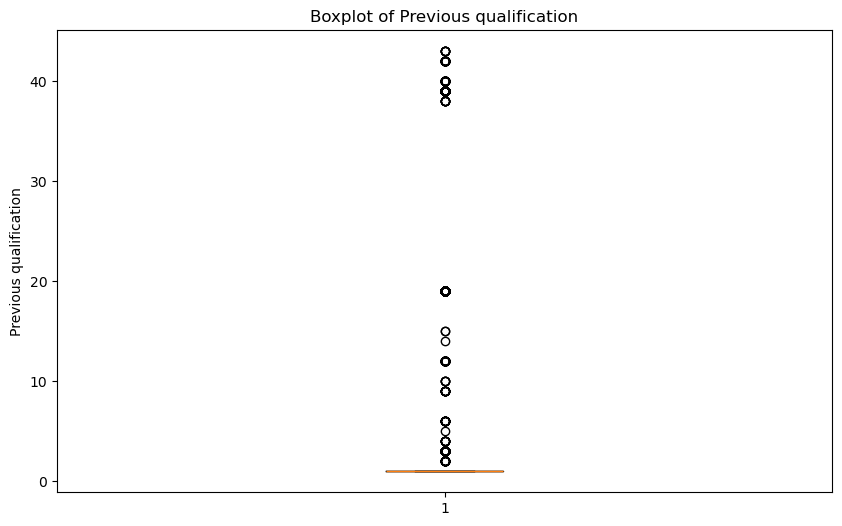

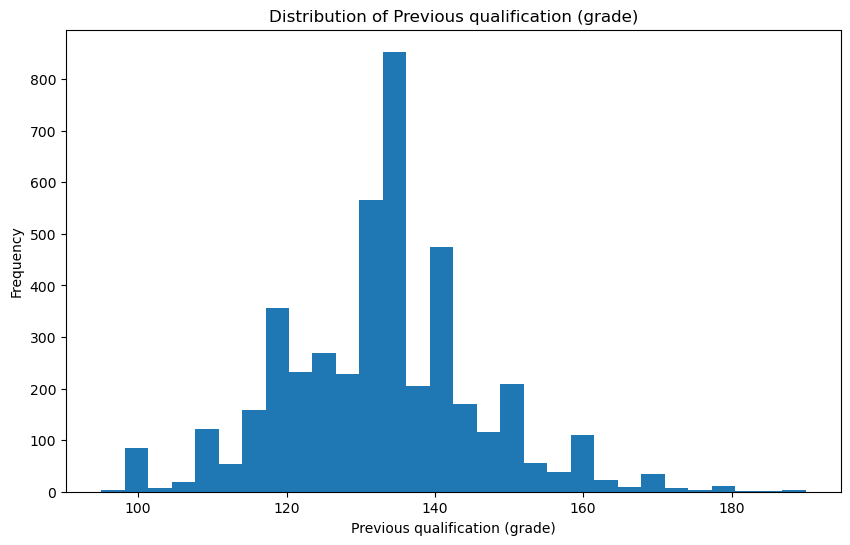

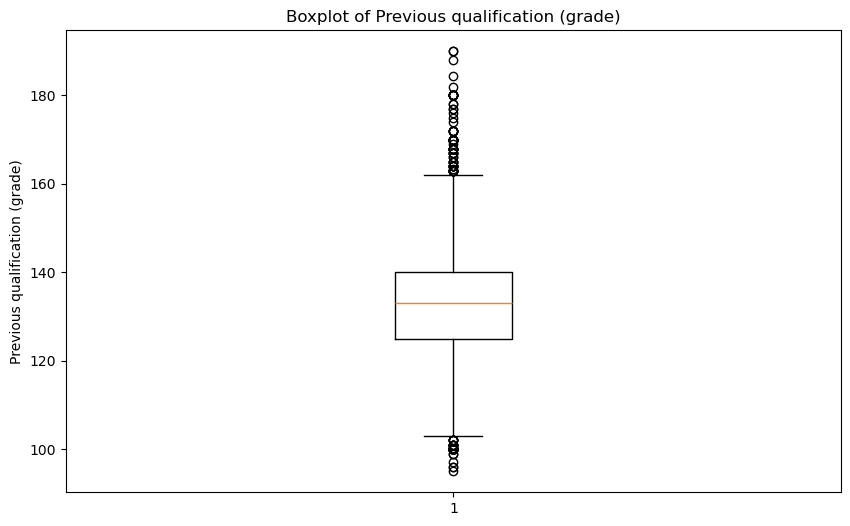

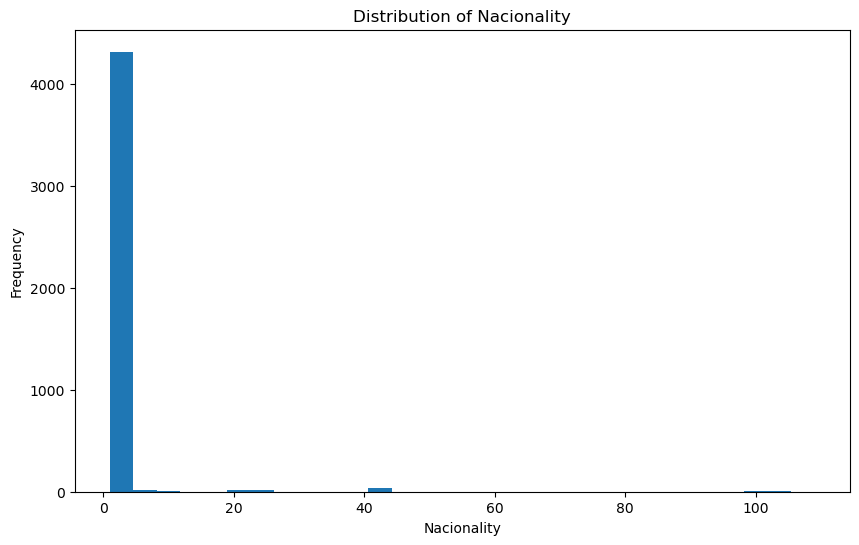

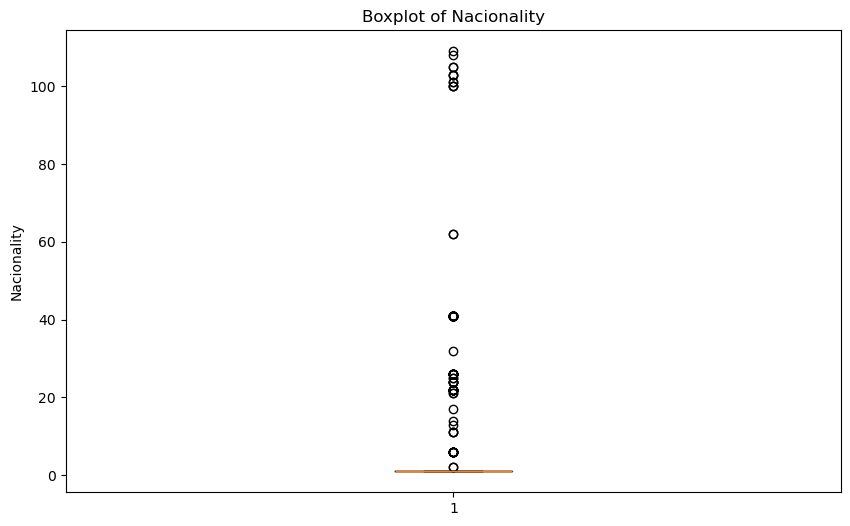

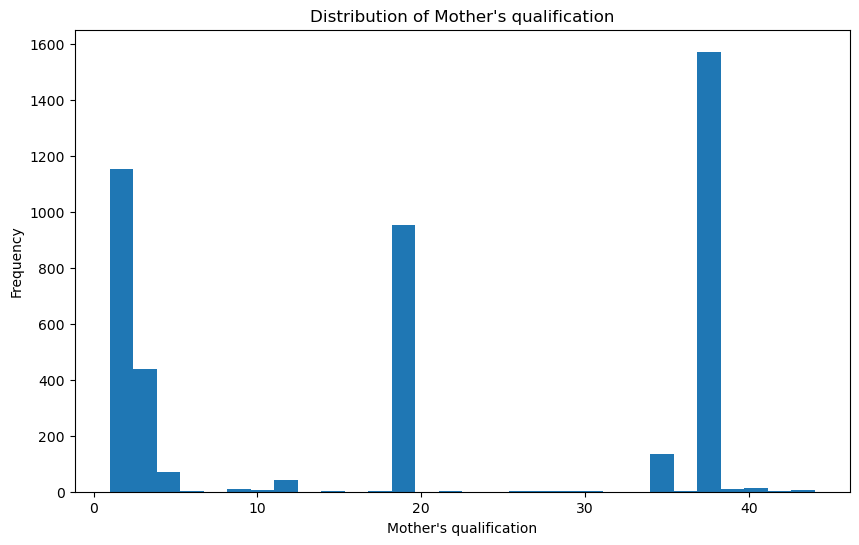

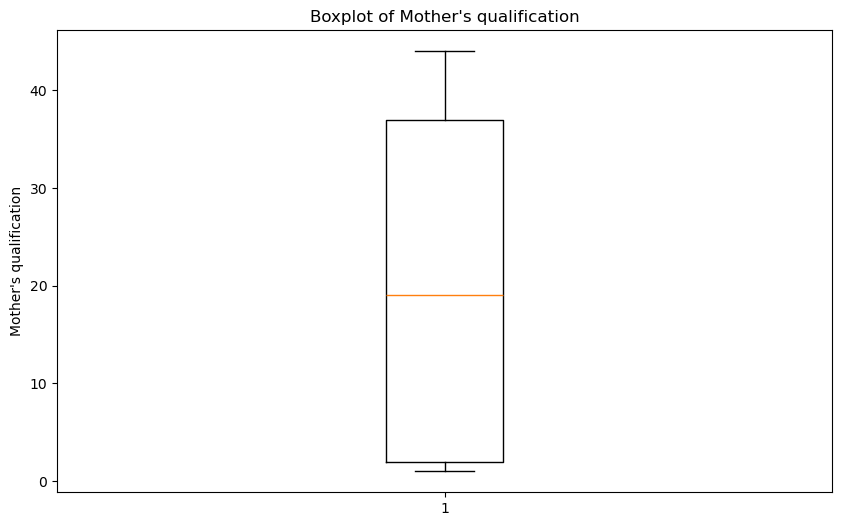

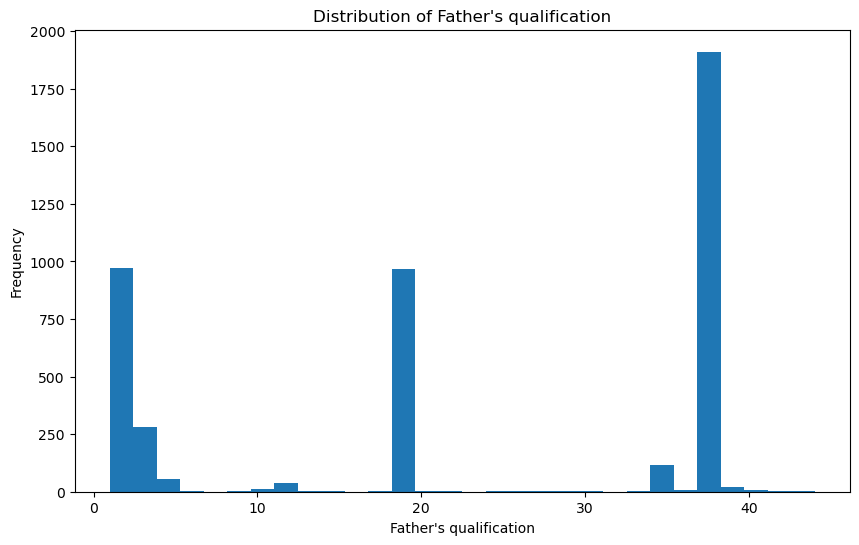

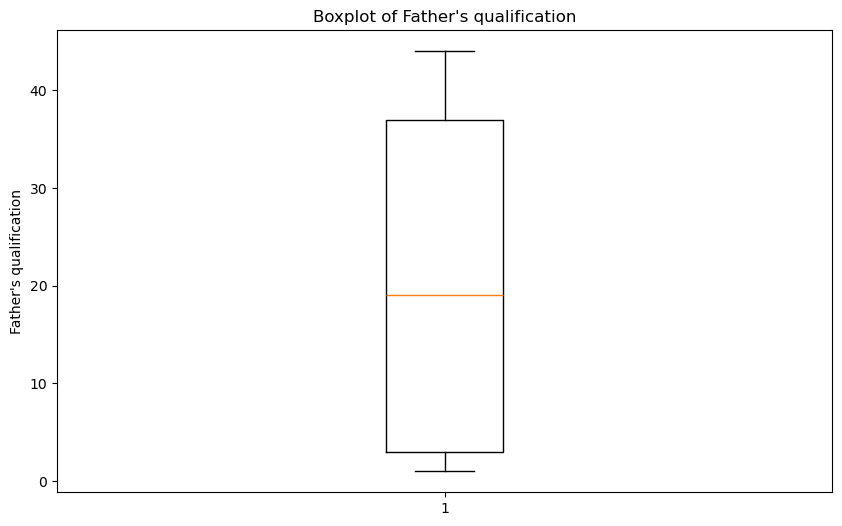

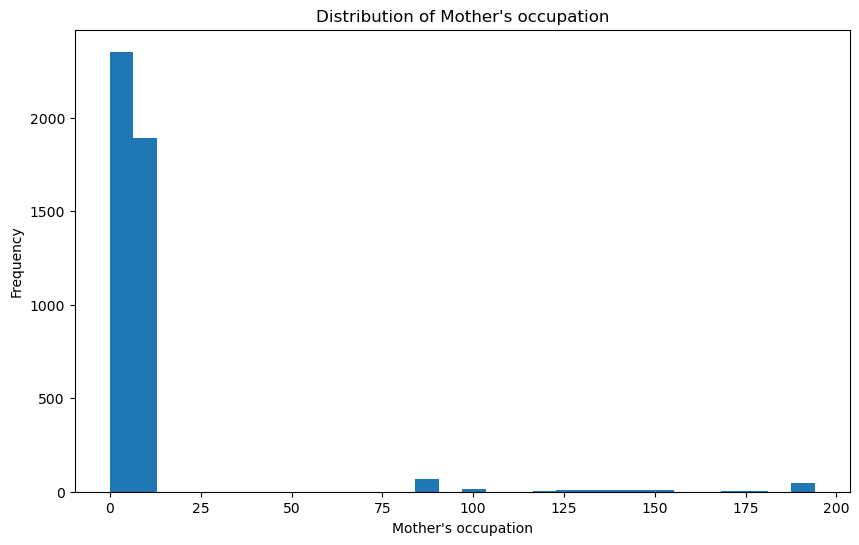

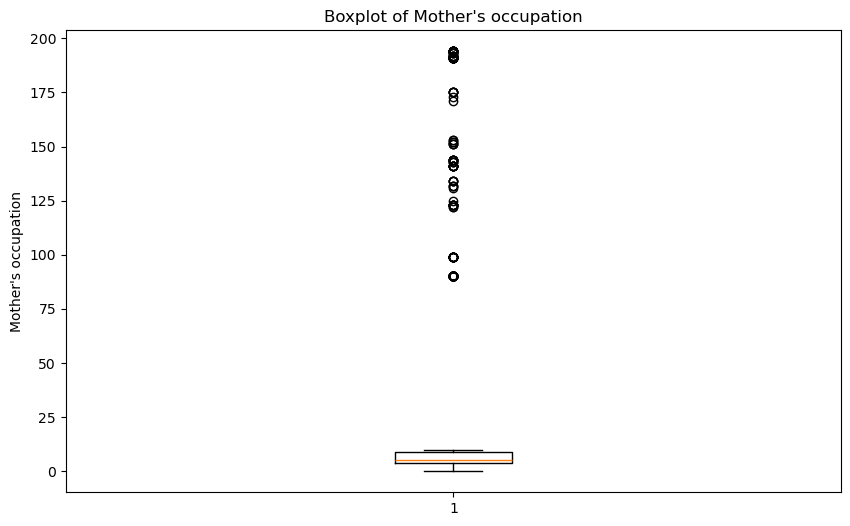

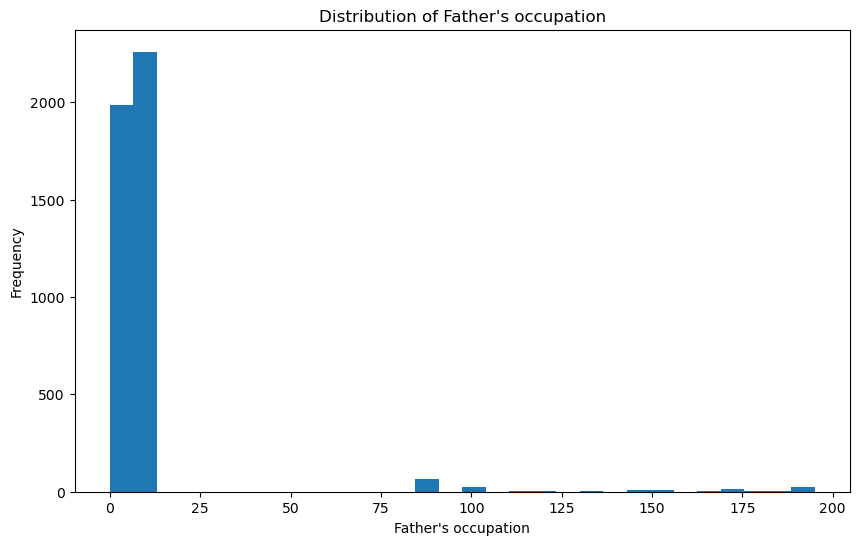

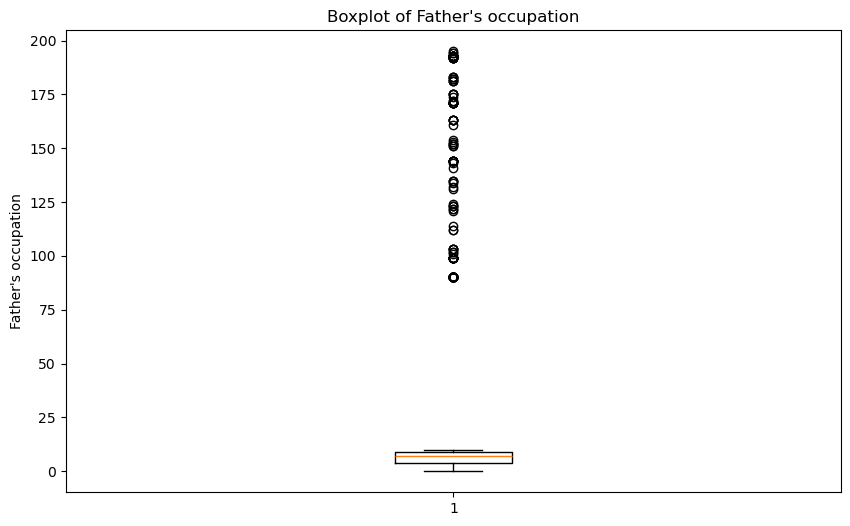

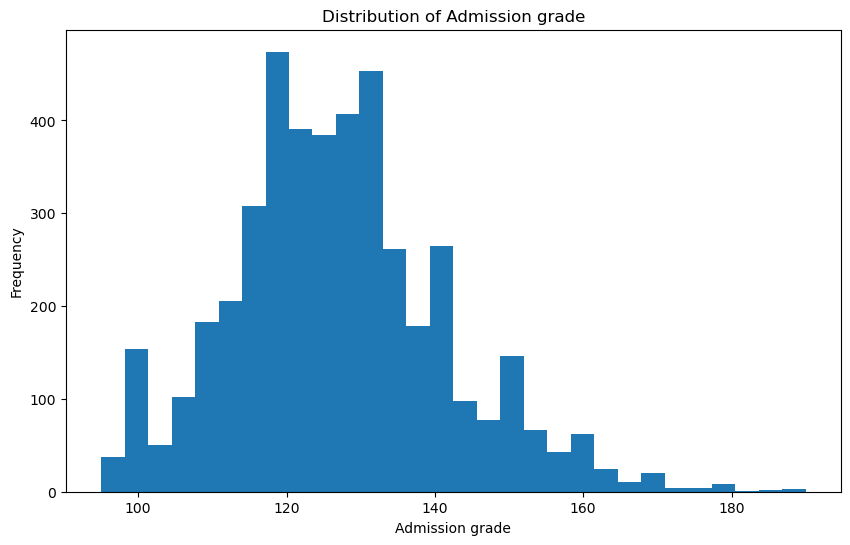

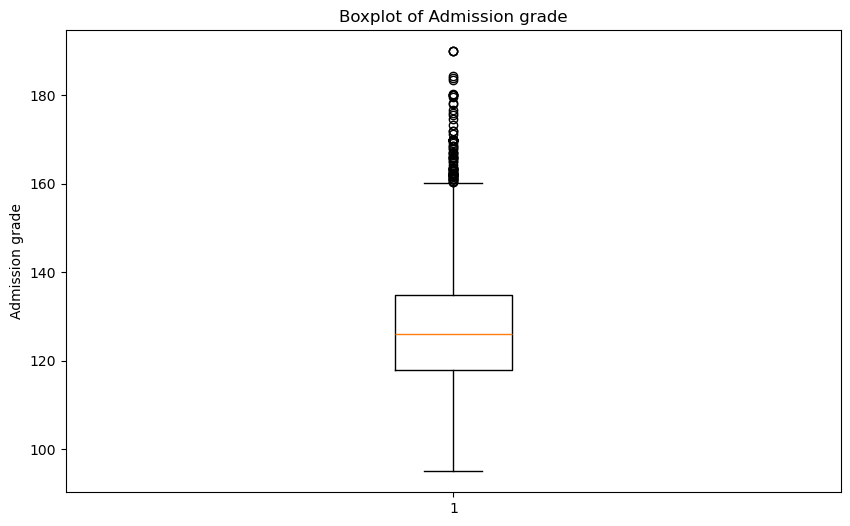

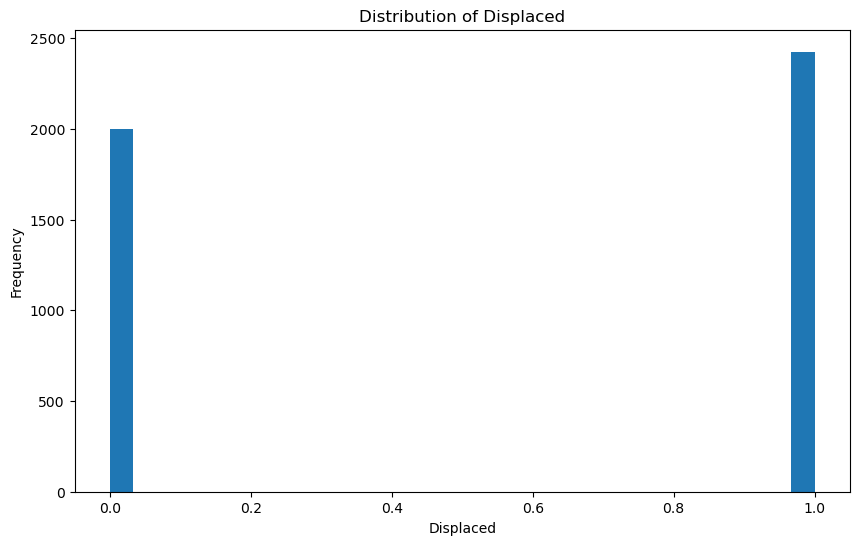

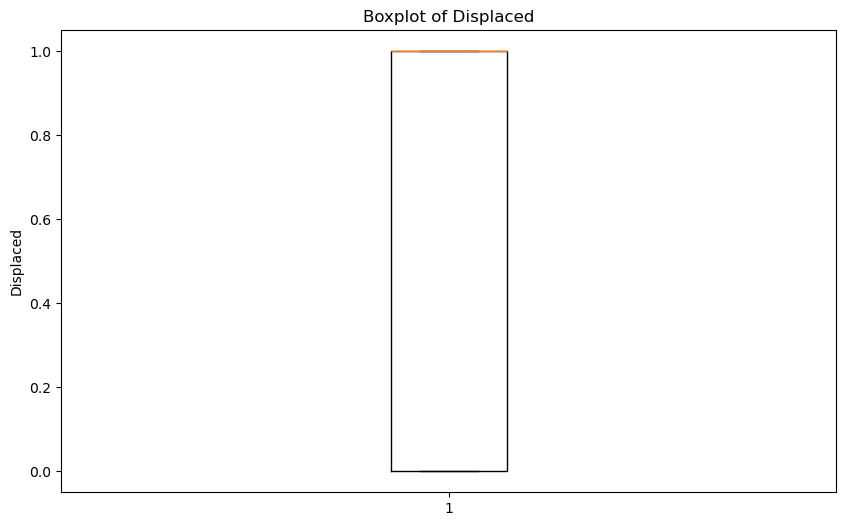

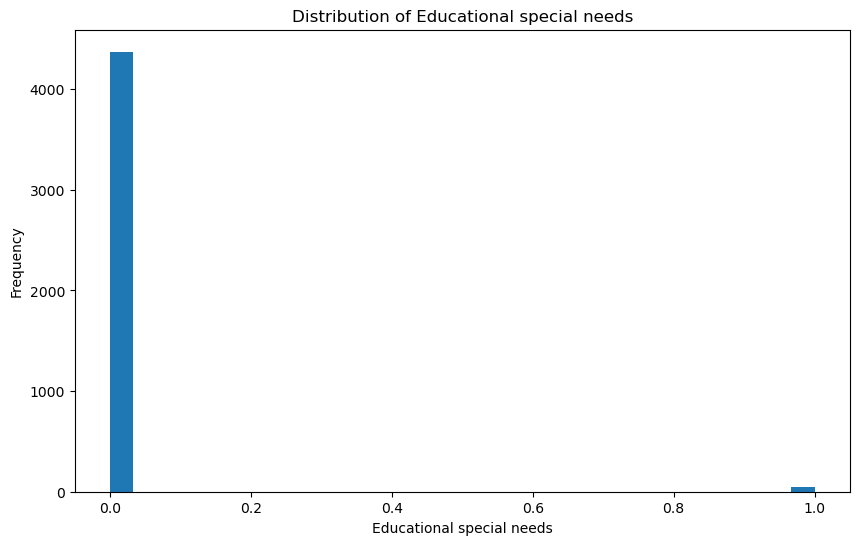

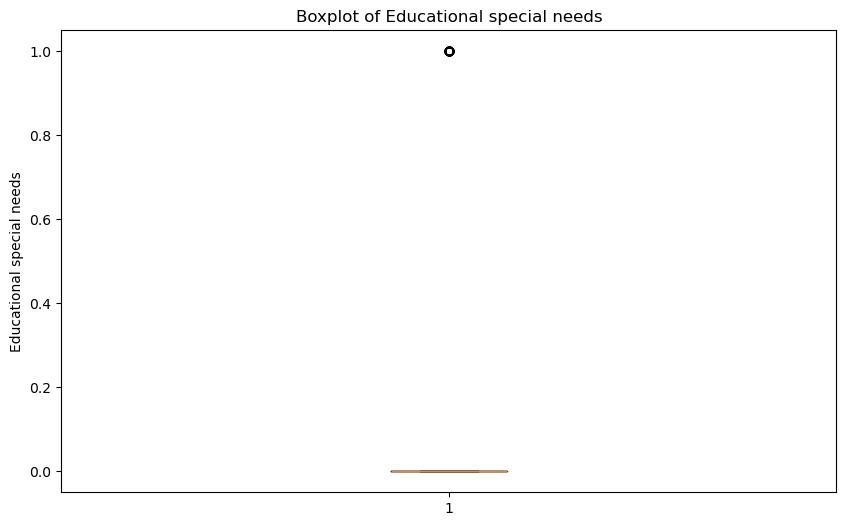

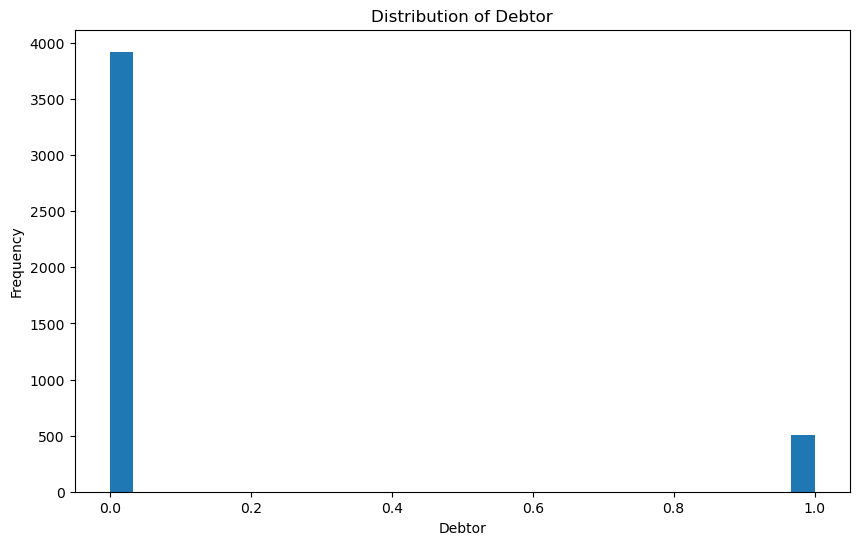

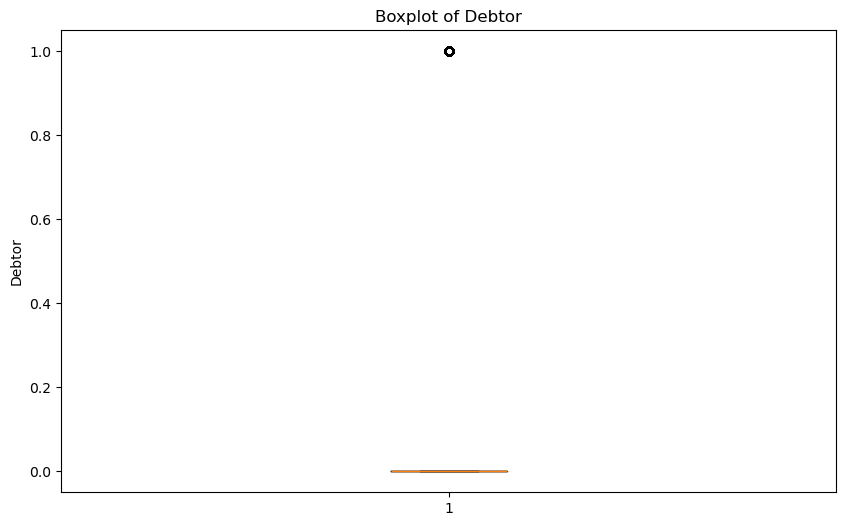

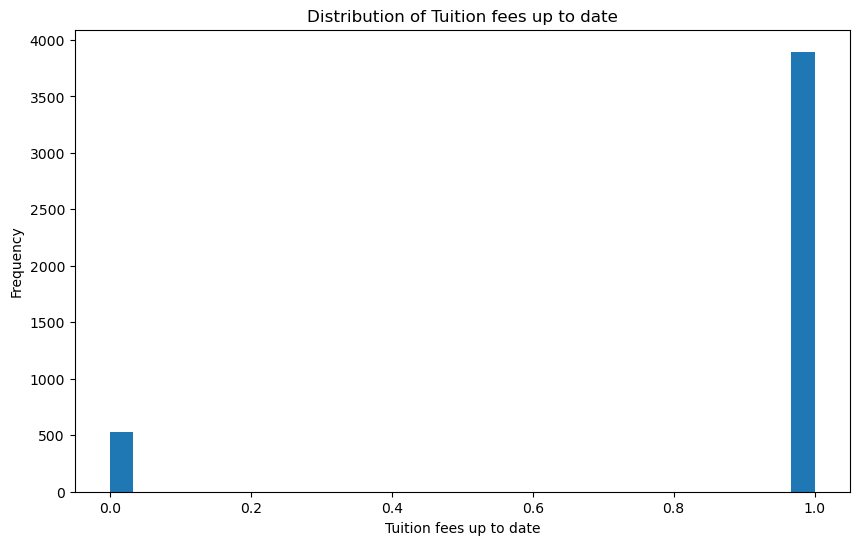

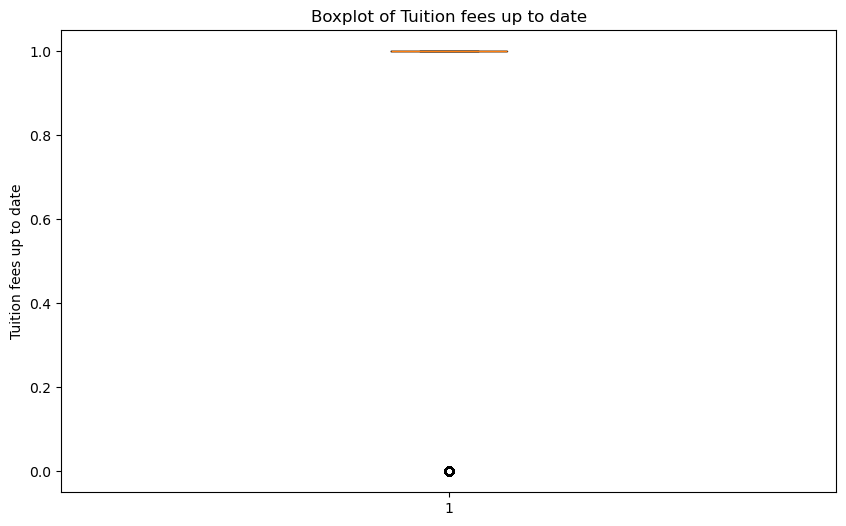

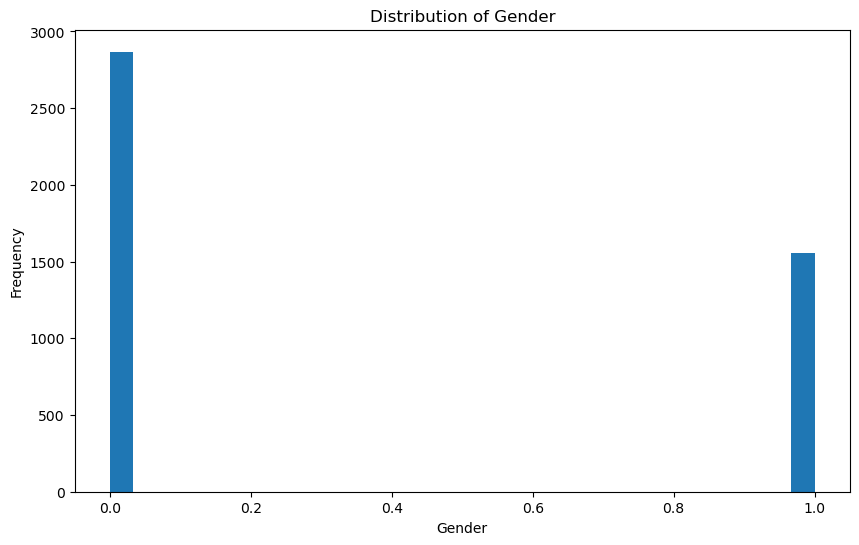

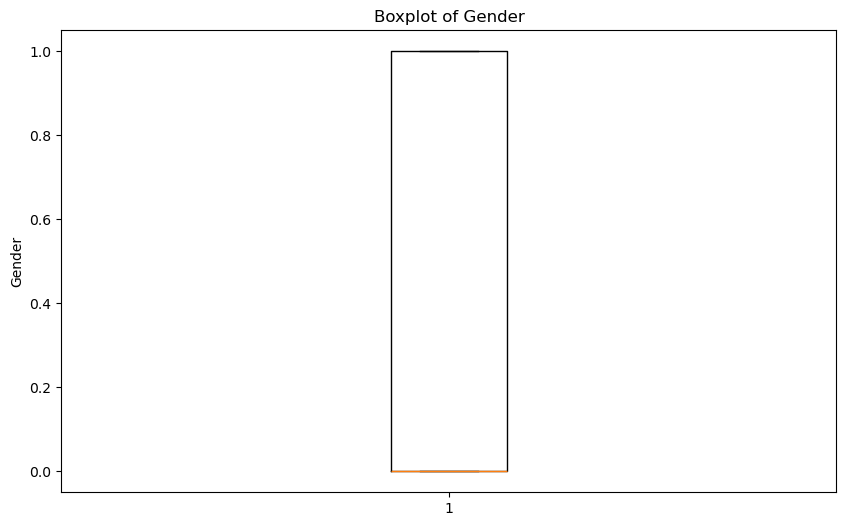

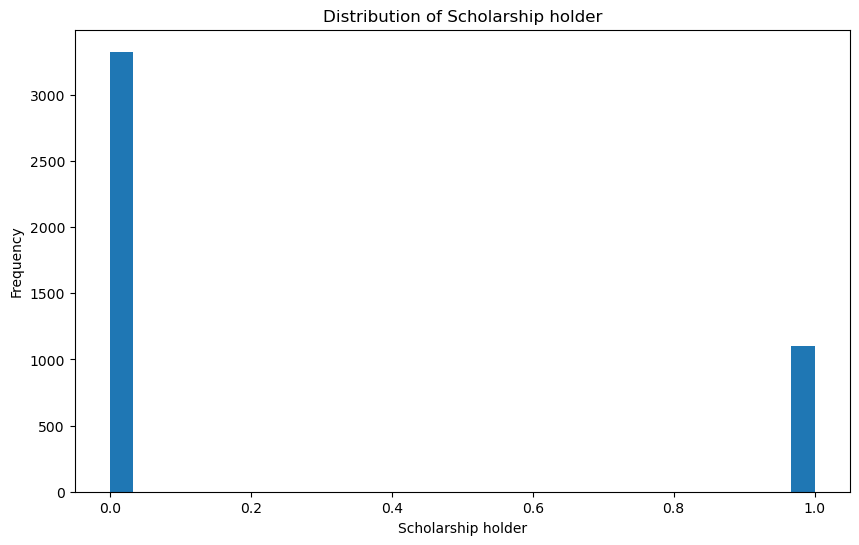

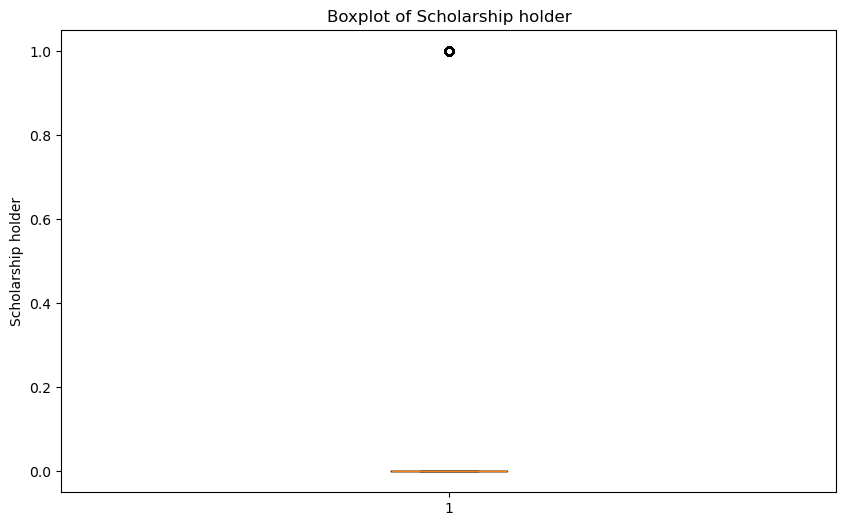

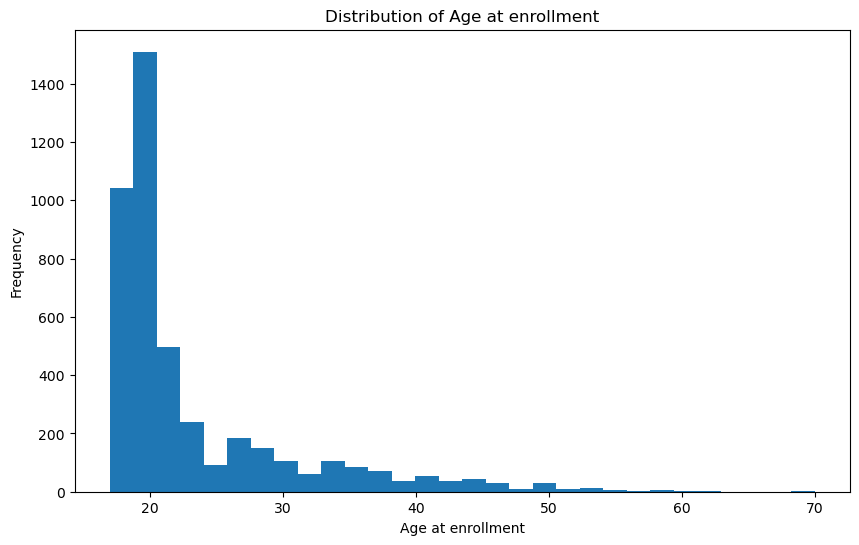

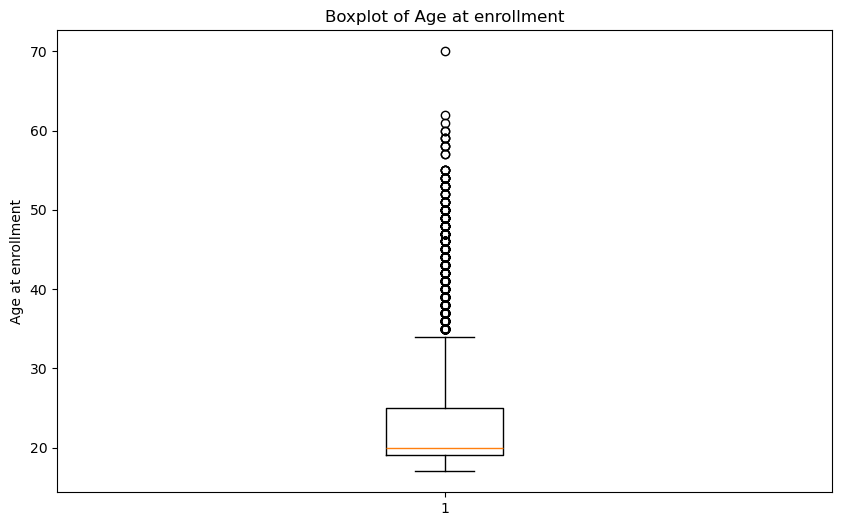

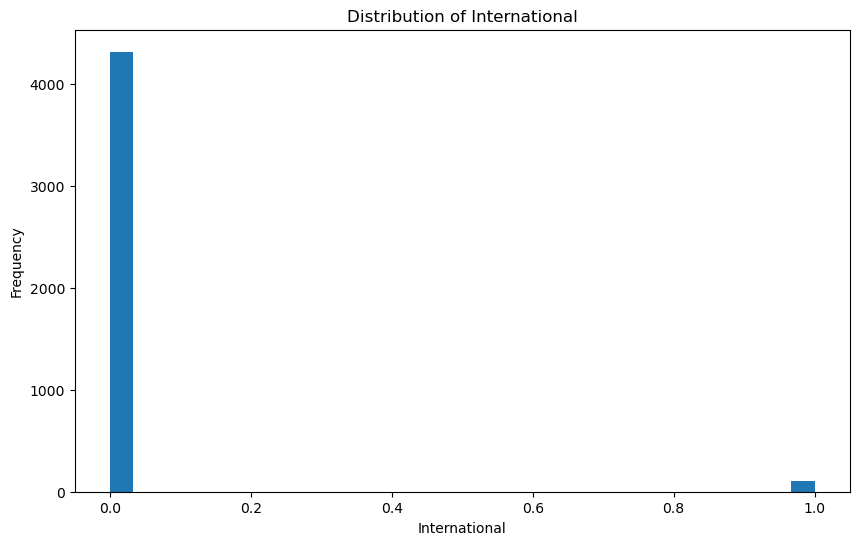

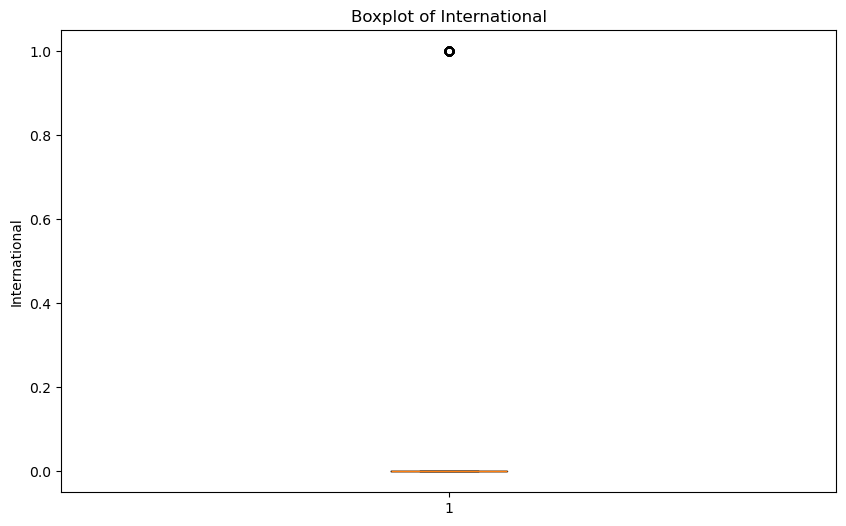

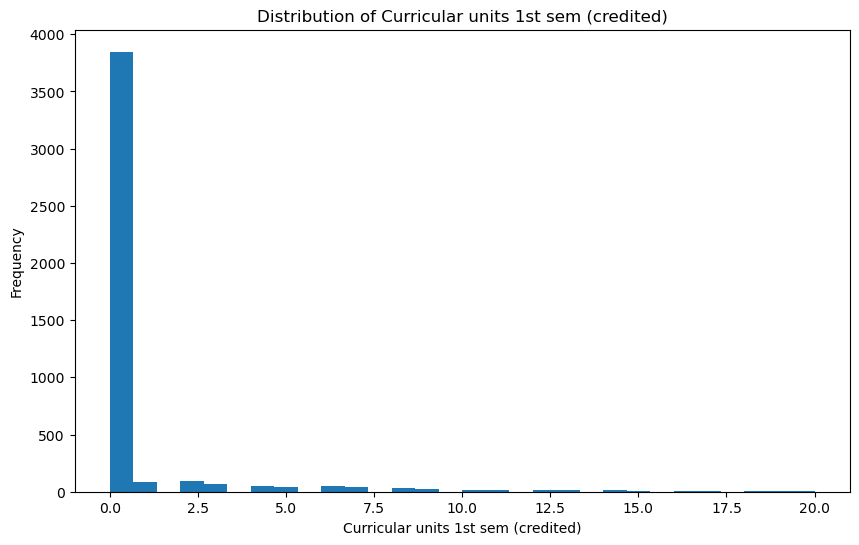

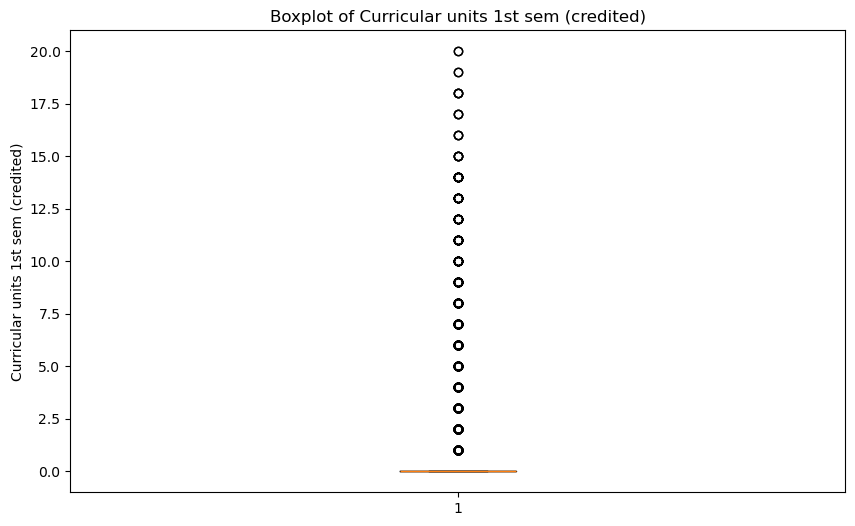

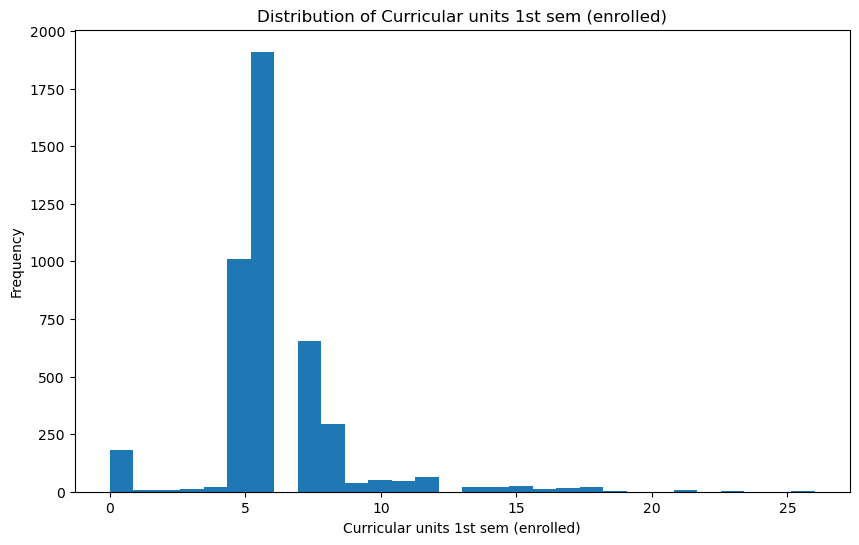

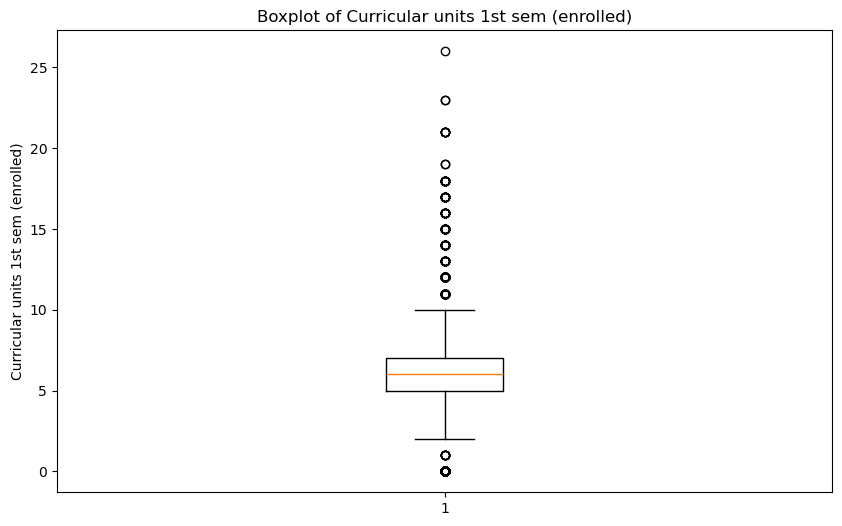

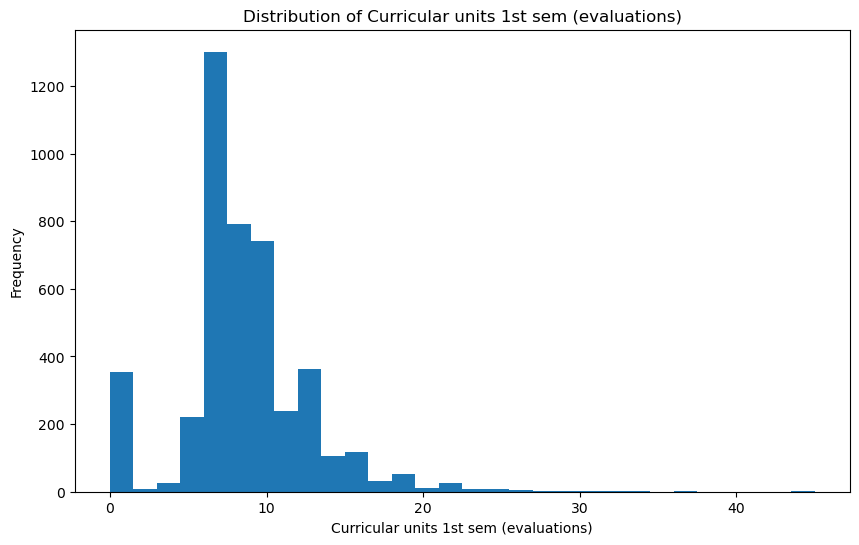

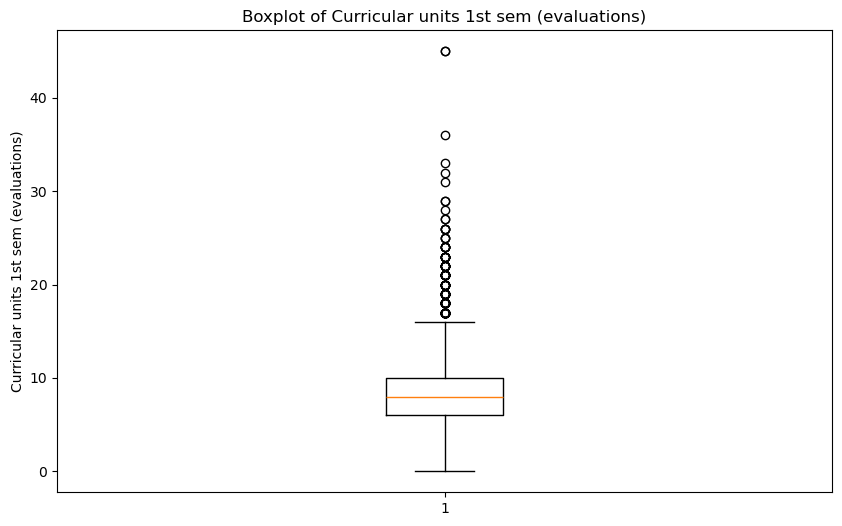

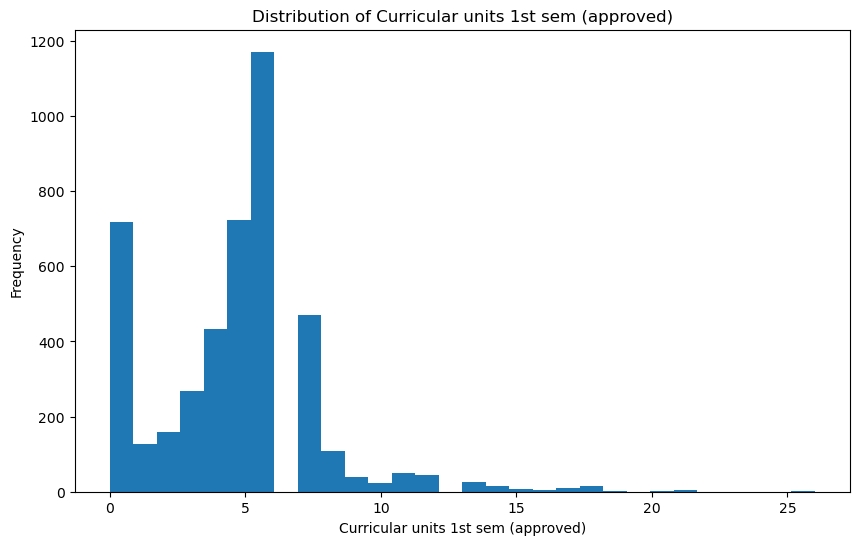

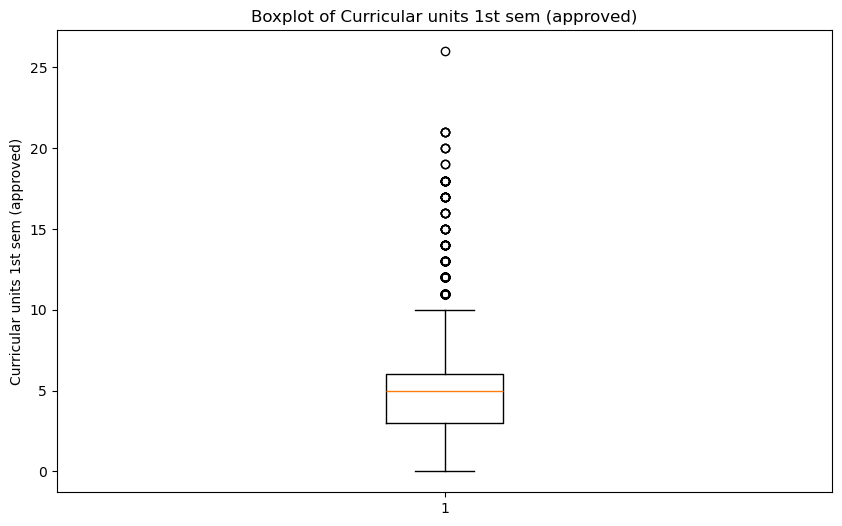

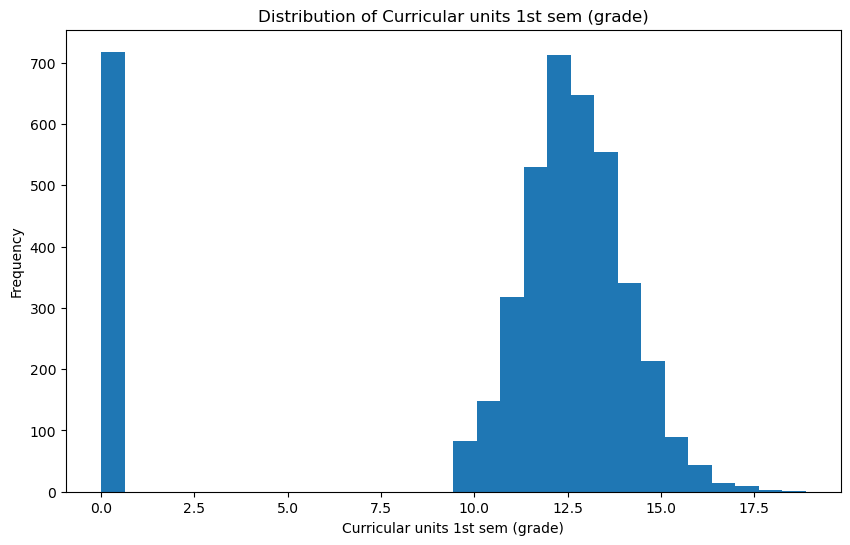

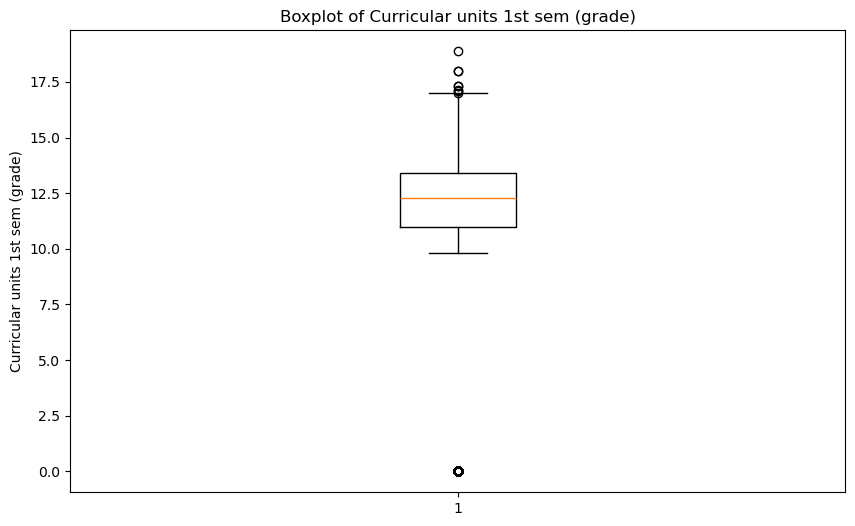

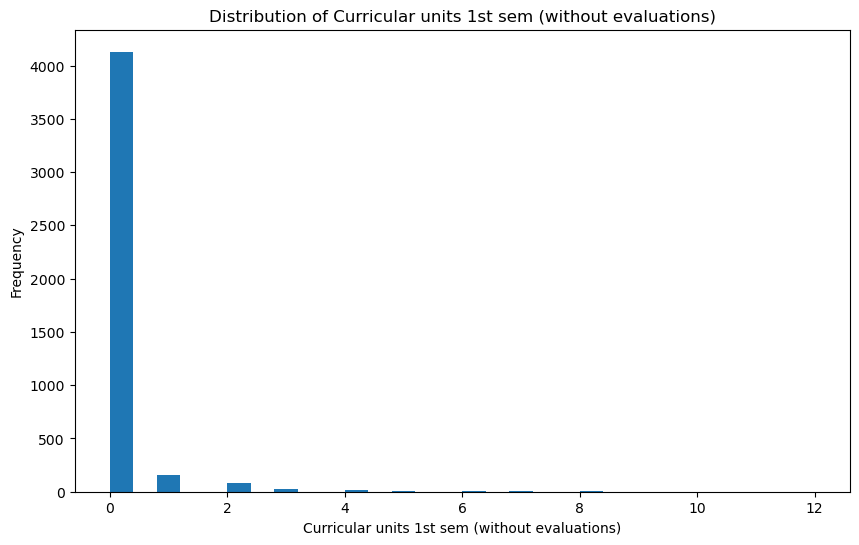

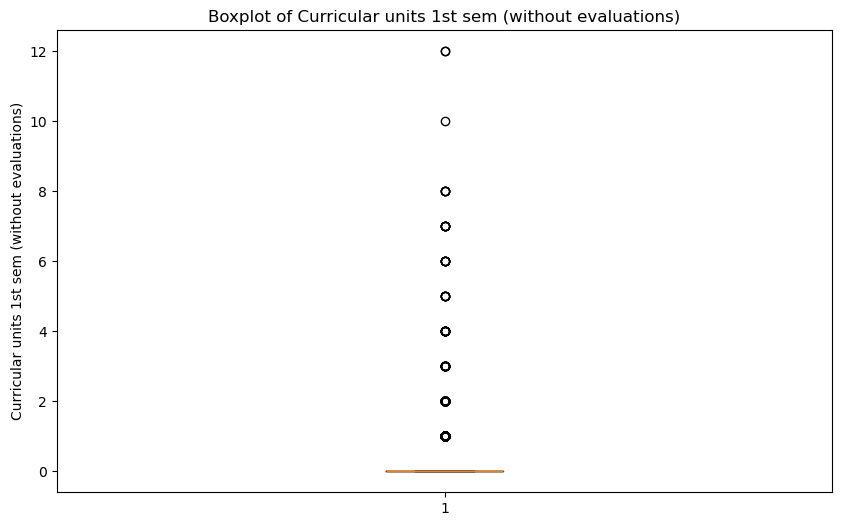

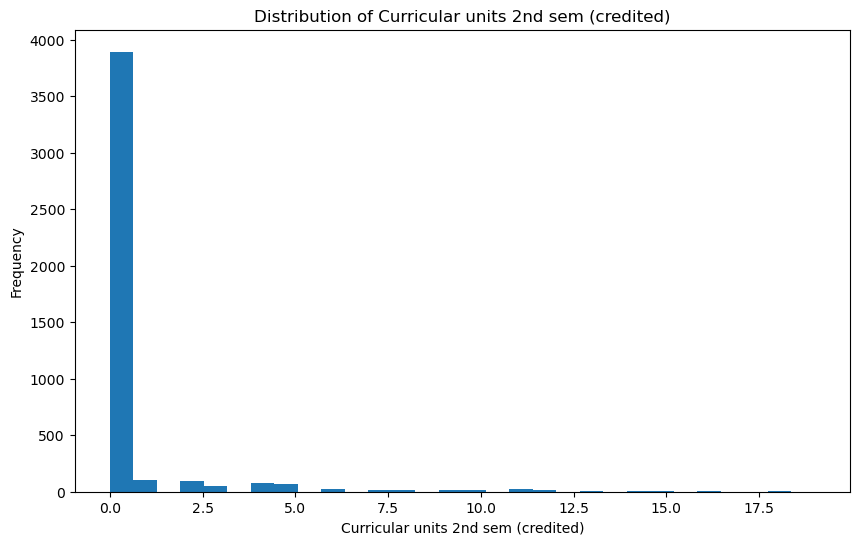

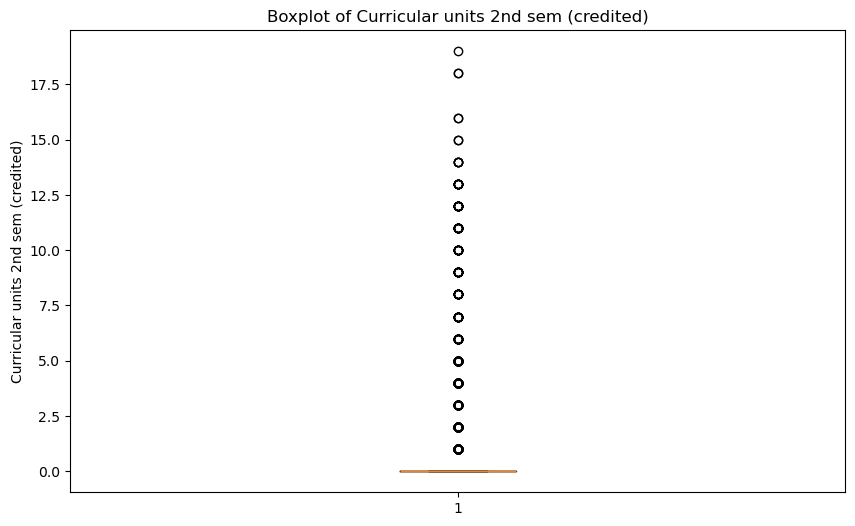

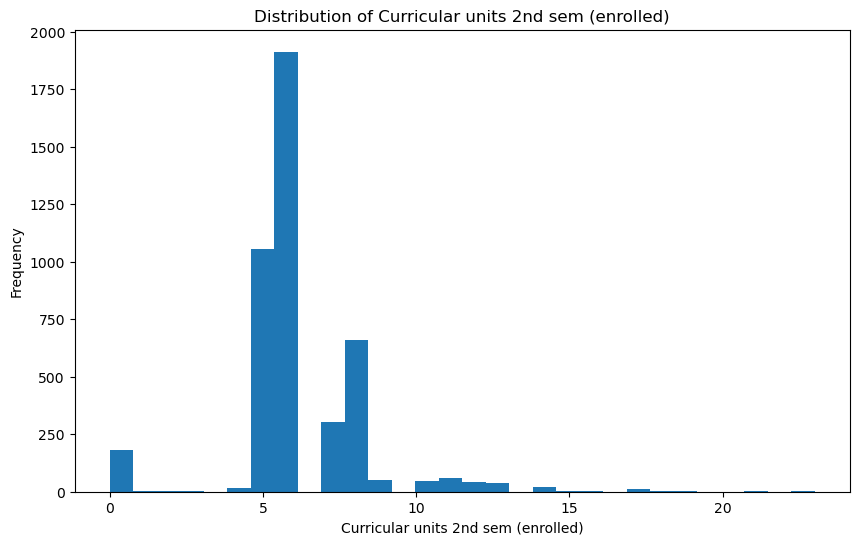

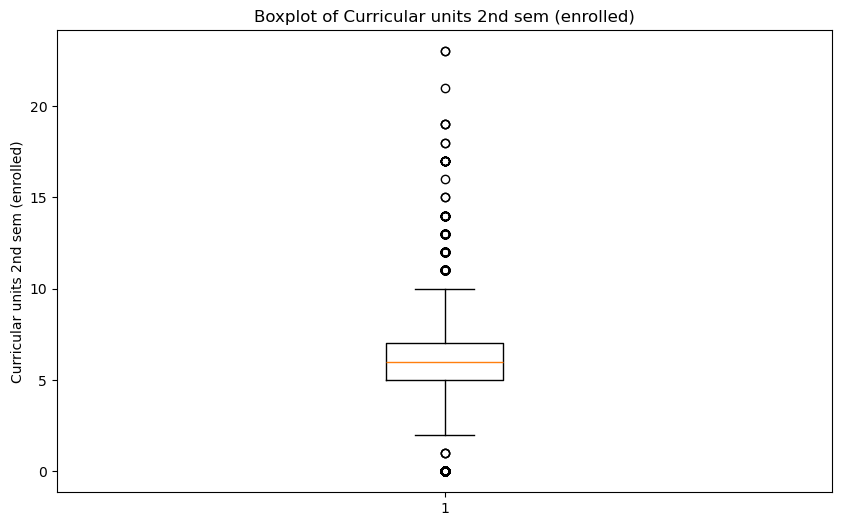

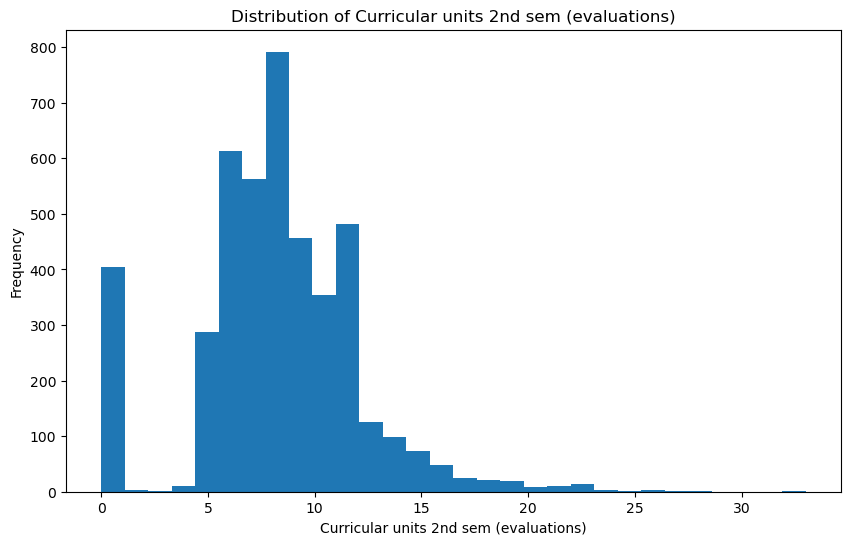

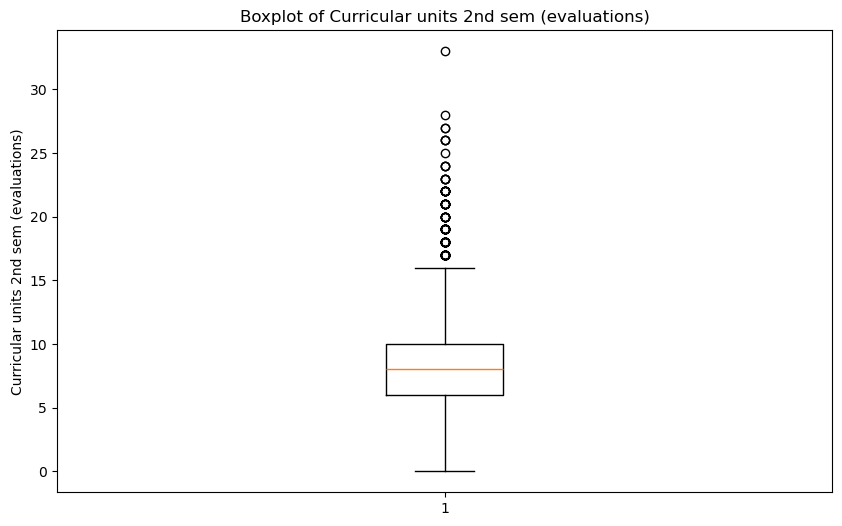

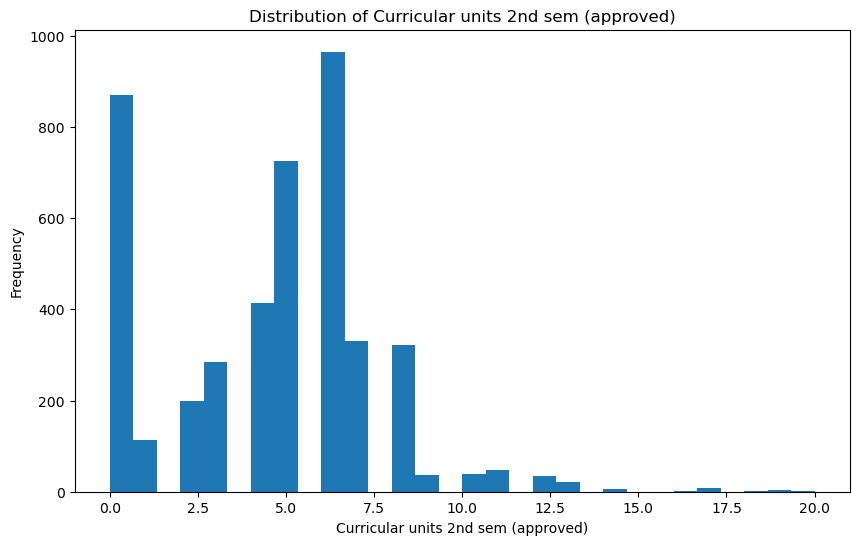

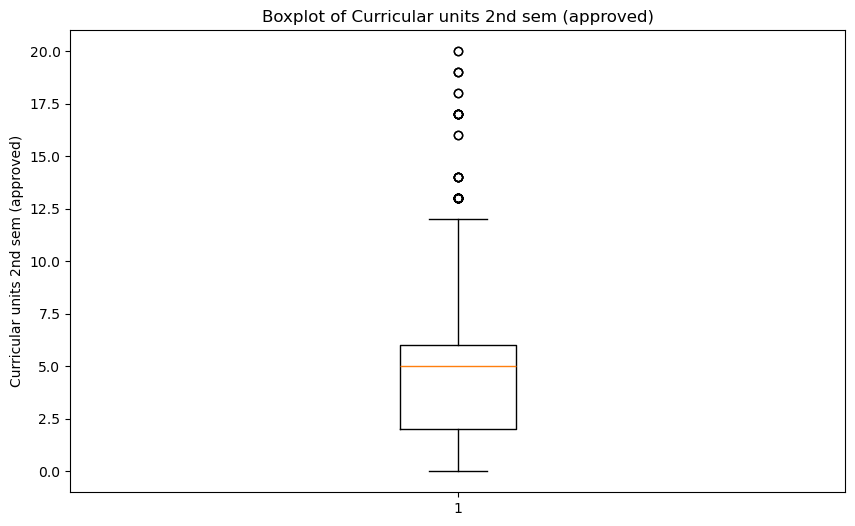

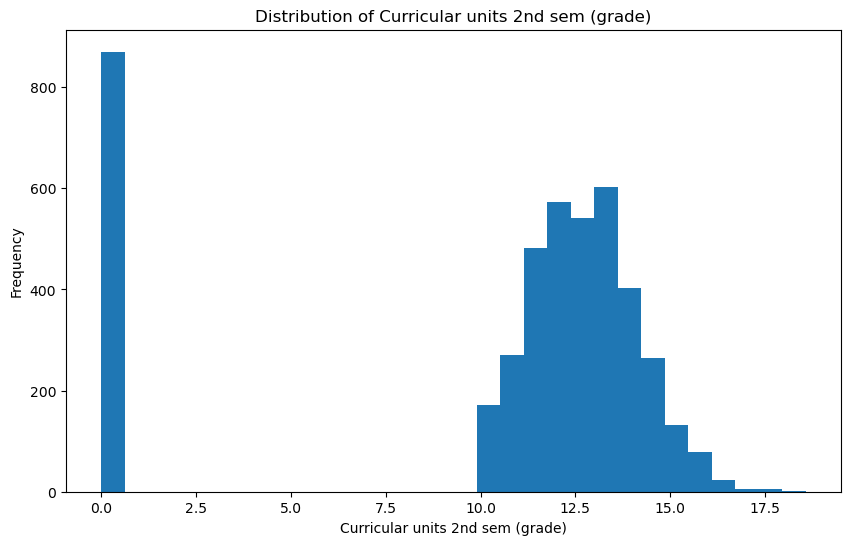

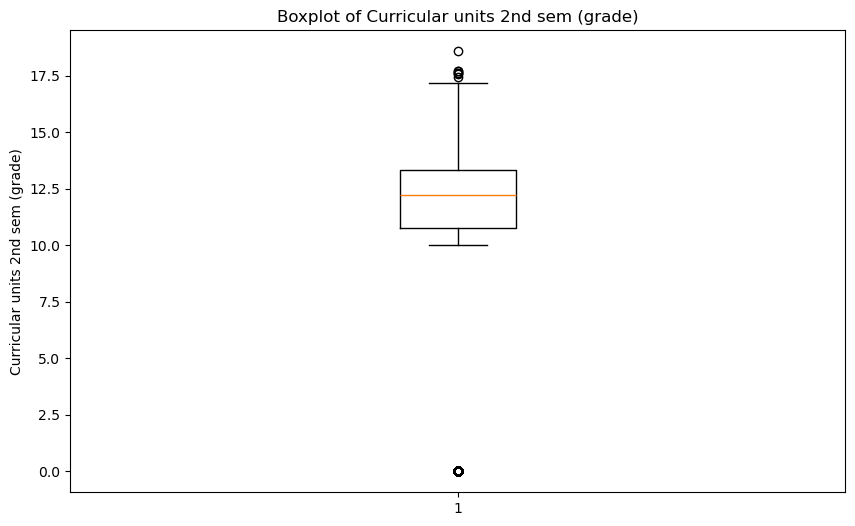

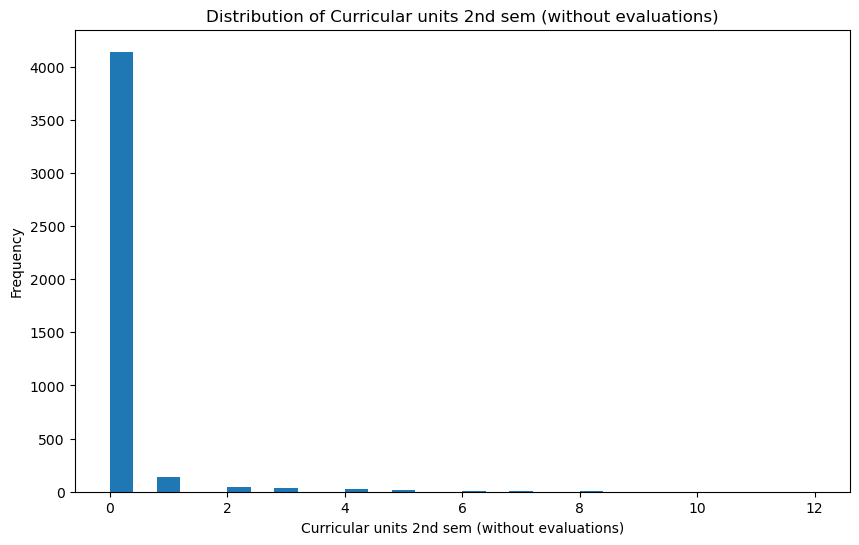

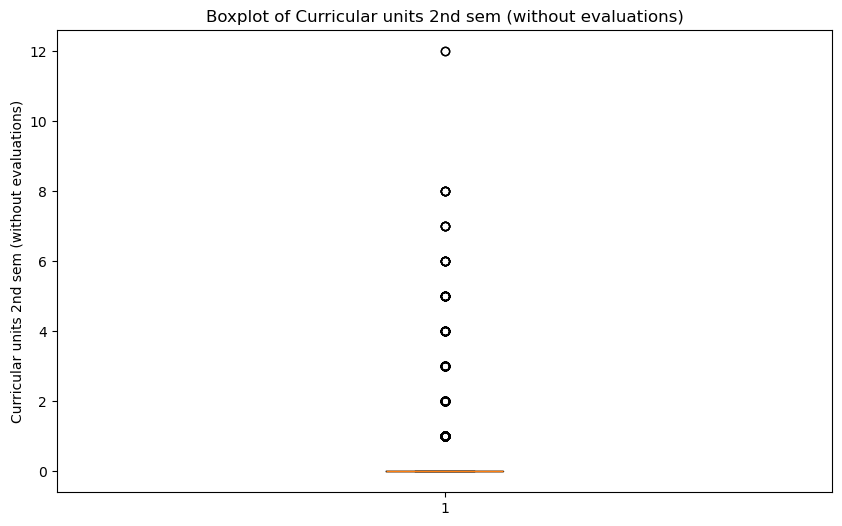

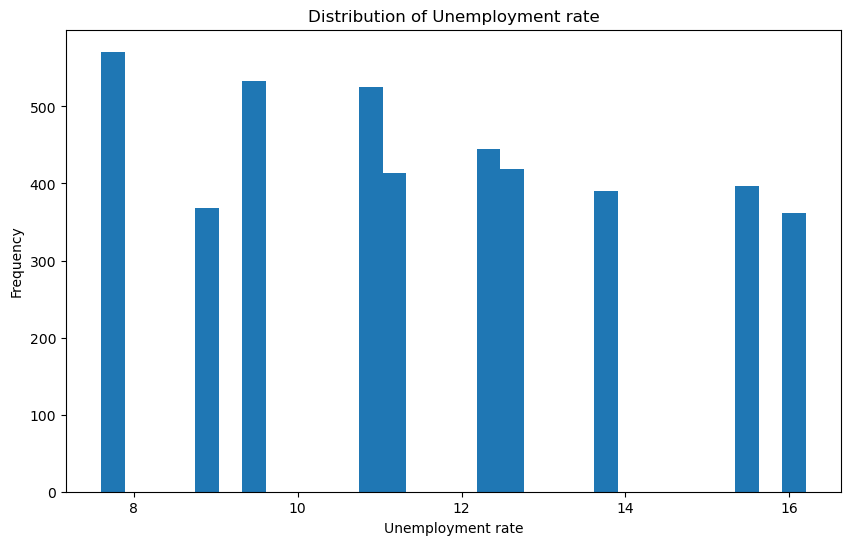

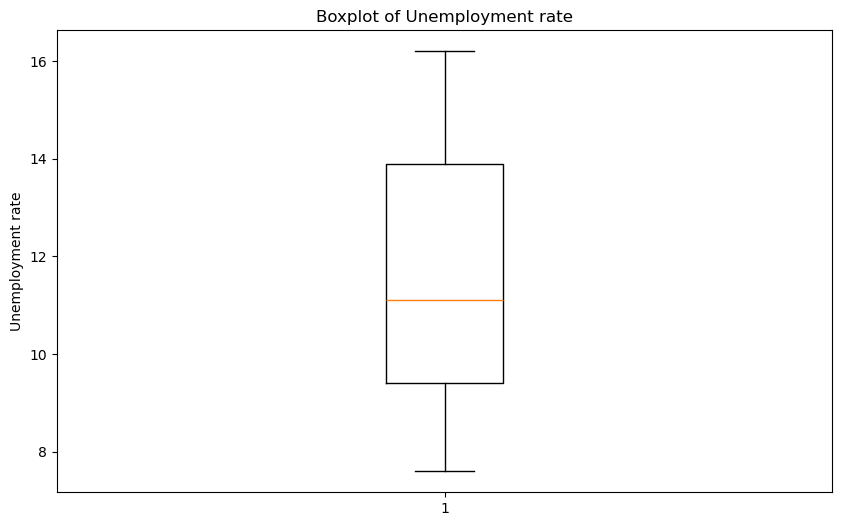

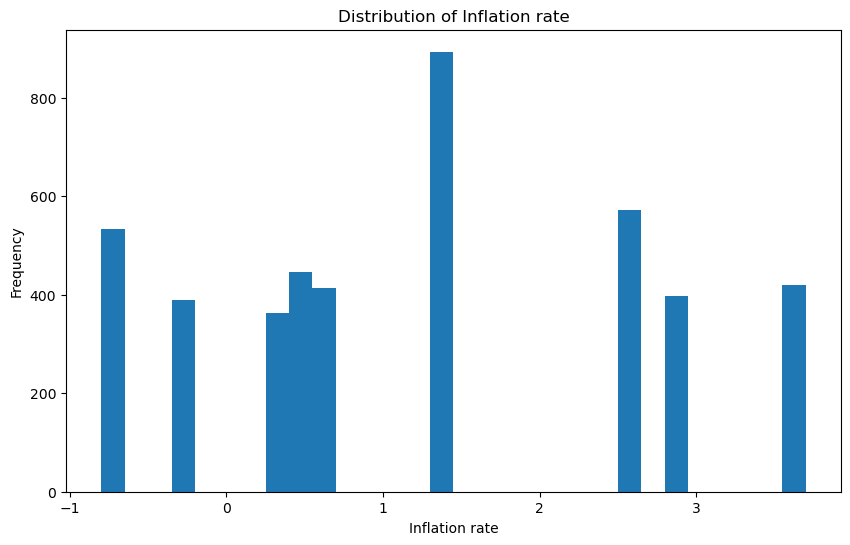

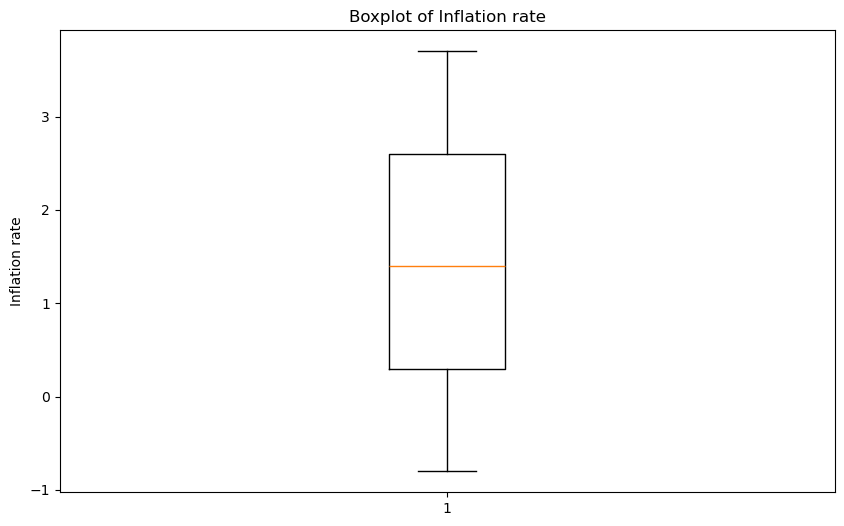

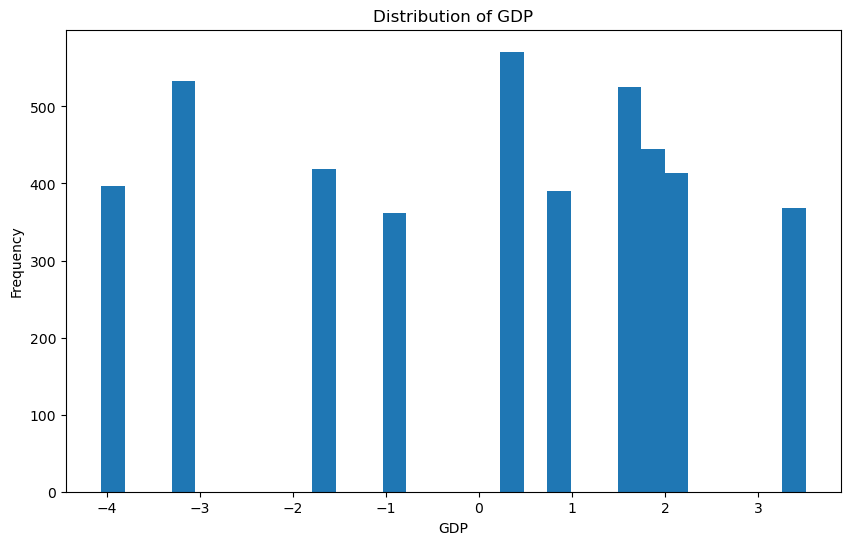

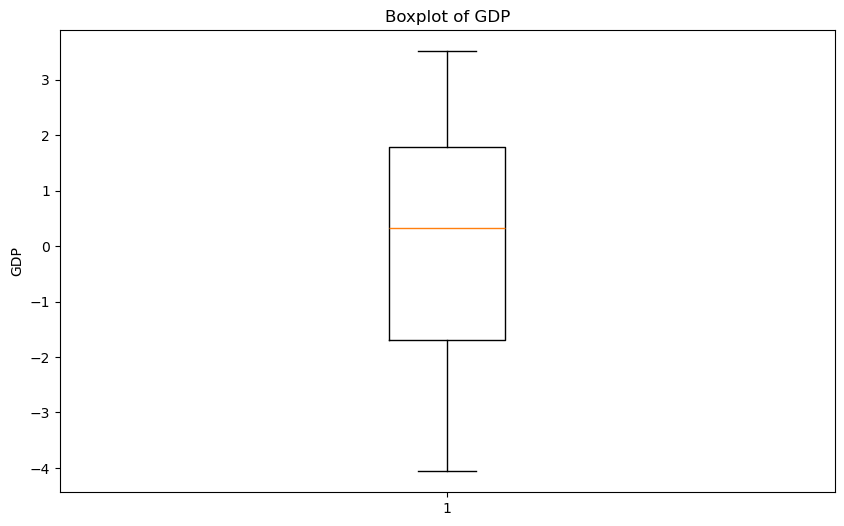

In [13]:
# First, let's properly parse the CSV with semicolon separator
df = pd.read_csv('data.csv', sep=';')

# Print basic information about the dataset
print("Dataset Information")
print("-" * 50)
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print("\nColumn Names:")
print(df.columns.tolist())

# Analyze each attribute
print("\nAttribute Analysis")
print("-" * 50)
for column in df.columns:
    print(f"\nAttribute: {column}")
    print(f"Data Type: {df[column].dtype}")
    
    # Calculate missing values
    missing_percent = (df[column].isnull().sum() / len(df)) * 100
    print(f"Missing Values: {missing_percent:.2f}%")
    
    # For numeric columns
    if pd.api.types.is_numeric_dtype(df[column]):
        print(f"Min: {df[column].min()}")
        print(f"Max: {df[column].max()}")
        print(f"Mean: {df[column].mean():.2f}")
        print(f"Median: {df[column].median():.2f}")
        print(f"Standard Deviation: {df[column].std():.2f}")
        
        # Check for outliers using IQR method
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        print(f"Number of outliers: {len(outliers)}")
        print(f"Outlier percentage: {(len(outliers)/len(df))*100:.2f}%")
    
    # For categorical columns
    else:
        unique_values = df[column].nunique()
        print(f"Number of unique values: {unique_values}")
        if unique_values < 10:  # Only show value counts if not too many unique values
            print("\nValue Counts:")
            print(df[column].value_counts())
    
    print("-" * 30)

# Create visualizations for numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
if len(numeric_columns) > 0:
    print("\nCreating visualizations for numeric columns...")
    for column in numeric_columns:
        plt.figure(figsize=(10, 6))
        plt.hist(df[column].dropna(), bins=30)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
        
        # Boxplot to visualize outliers
        plt.figure(figsize=(10, 6))
        plt.boxplot(df[column].dropna())
        plt.title(f'Boxplot of {column}')
        plt.ylabel(column)
        plt.show()

In [14]:
# First, let's see the unique values in the Target column
print("Unique values in Target column:")
print(df['Target'].unique())

# Map categorical values to numerical values
# Assuming the Target column has values like 'Dropout', 'Graduate', 'Enrolled'
target_mapping = {
    'Dropout': 0,
    'Enrolled': 1,
    'Graduate': 2
}

# Create a new numerical target column
df['Target_numerical'] = df['Target'].map(target_mapping)

# Verify the mapping
print("\nValue counts after mapping:")
print(df['Target_numerical'].value_counts())

# You can now use 'Target_numerical' for your analysis

Unique values in Target column:
['Dropout' 'Graduate' 'Enrolled']

Value counts after mapping:
Target_numerical
2    2209
0    1421
1     794
Name: count, dtype: int64


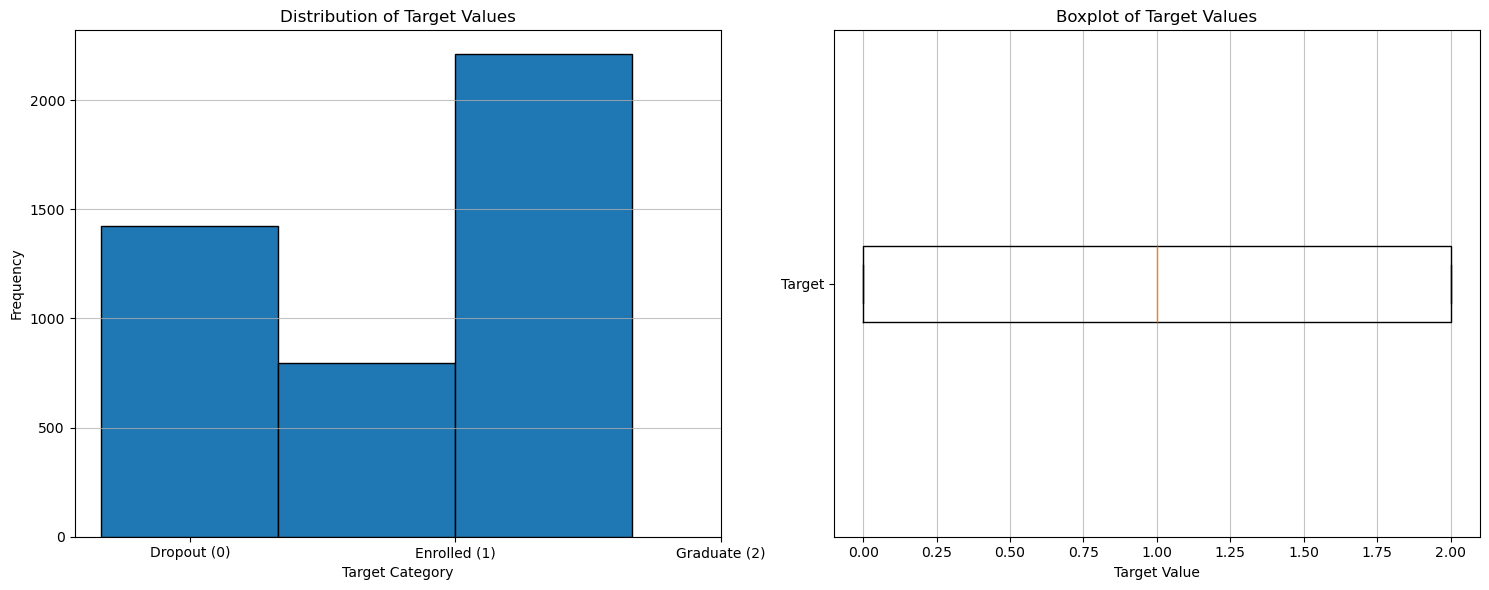

Target Value Statistics:
------------------------------
Total Count: 4424

Value Counts:
Target_numerical
0    1421
1     794
2    2209
Name: count, dtype: int64

Percentage Distribution:
Target_numerical
0    32.120253
1    17.947559
2    49.932188
Name: proportion, dtype: float64


In [15]:
# Create a figure with two subplots
plt.figure(figsize=(15, 6))

# Distribution plot (Histogram)
plt.subplot(1, 2, 1)
plt.hist(df['Target_numerical'], bins=3, edgecolor='black', align='left')
plt.xticks([0, 1, 2], ['Dropout (0)', 'Enrolled (1)', 'Graduate (2)'])
plt.title('Distribution of Target Values')
plt.xlabel('Target Category')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(df['Target_numerical'], vert=False)
plt.yticks([1], ['Target'])
plt.title('Boxplot of Target Values')
plt.xlabel('Target Value')
plt.grid(axis='x', alpha=0.75)

plt.tight_layout()
plt.show()

# Print some statistics
print("Target Value Statistics:")
print("-" * 30)
print(f"Total Count: {len(df['Target_numerical'])}")
print("\nValue Counts:")
print(df['Target_numerical'].value_counts().sort_index())
print("\nPercentage Distribution:")
print((df['Target_numerical'].value_counts(normalize=True) * 100).sort_index())

b. Data cleaning.  
i. Fix or remove outliers  
ii. Filling missing values or drop their rows if it is necessary.  


In [17]:
# Create a copy of the original dataframe
df_cleaned = df.copy()

# First, let's properly identify missing values
# Convert empty strings, spaces, and other placeholders to NaN
df_cleaned = df_cleaned.replace(['', ' ', 'NA', 'N/A', 'na', 'n/a'], np.nan)

# Now let's check for missing values again
print("\nMissing values before cleaning:")
missing_before = df_cleaned.isnull().sum()
print(missing_before)

# Handle missing values in Previous qualification and Admission grade
# For Previous qualification (categorical), fill with mode of nationality group
df_cleaned['Previous qualification'] = df_cleaned.groupby('Nacionality')['Previous qualification'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
)

# For Admission grade (continuous), fill with median of nationality group
df_cleaned['Admission grade'] = df_cleaned.groupby('Nacionality')['Admission grade'].transform(
    lambda x: x.fillna(x.median())
)

# Drop any remaining rows with missing values
df_cleaned = df_cleaned.dropna()

print("\nMissing values after cleaning:")
missing_after = df_cleaned.isnull().sum()
print(missing_after)

print("\nDataset shape before cleaning:", df.shape)
print("Dataset shape after cleaning:", df_cleaned.shape)

# Print the number of rows removed
rows_removed = len(df) - len(df_cleaned)
print(f"\nNumber of rows removed: {rows_removed}")
print(f"Percentage of data removed: {(rows_removed/len(df))*100:.2f}%")

# Save the cleaned dataset
df_cleaned.to_csv('cleaned_data.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_data.csv'")


Missing values before cleaning:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder             

feature selection



feature selection

discretize continuous features, decompose/aggregate features

Scaling Standardized features

Decision tree (Naive bayes)

Clustering

Short list best models?

Analyze the most significant variables for each algorithm

Have another round of feature selection and engineering

Double-click (or enter) to edit

